In [28]:
import numpy as np
import pandas as pd
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler

In [29]:
data_classifier = pd.read_csv("D:\ML\data\weather_data.csv", delimiter=',')

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(data_classifier)

data_classifier = scaler.transform(data_classifier)
data_classifier = pd.DataFrame(data_classifier)

data_classifier = data_classifier[:10000]

balance = len(data_classifier.loc[data_classifier[16]==0])//len(data_classifier.loc[data_classifier[16]==1])

data_sample = data_classifier.loc[data_classifier[16]==1]
data_sample = data_sample.loc[data_sample.index.repeat(balance)]
data_n = pd.concat([data_classifier.loc[data_classifier[16]==0], data_sample]).sample(frac=1)

In [30]:
from sklearn.tree import DecisionTreeClassifier

y_class = data_n[16]
X_class = data_n.drop([16], axis=1) 

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_class, y_class)

DecisionTreeClassifier(max_depth=3)

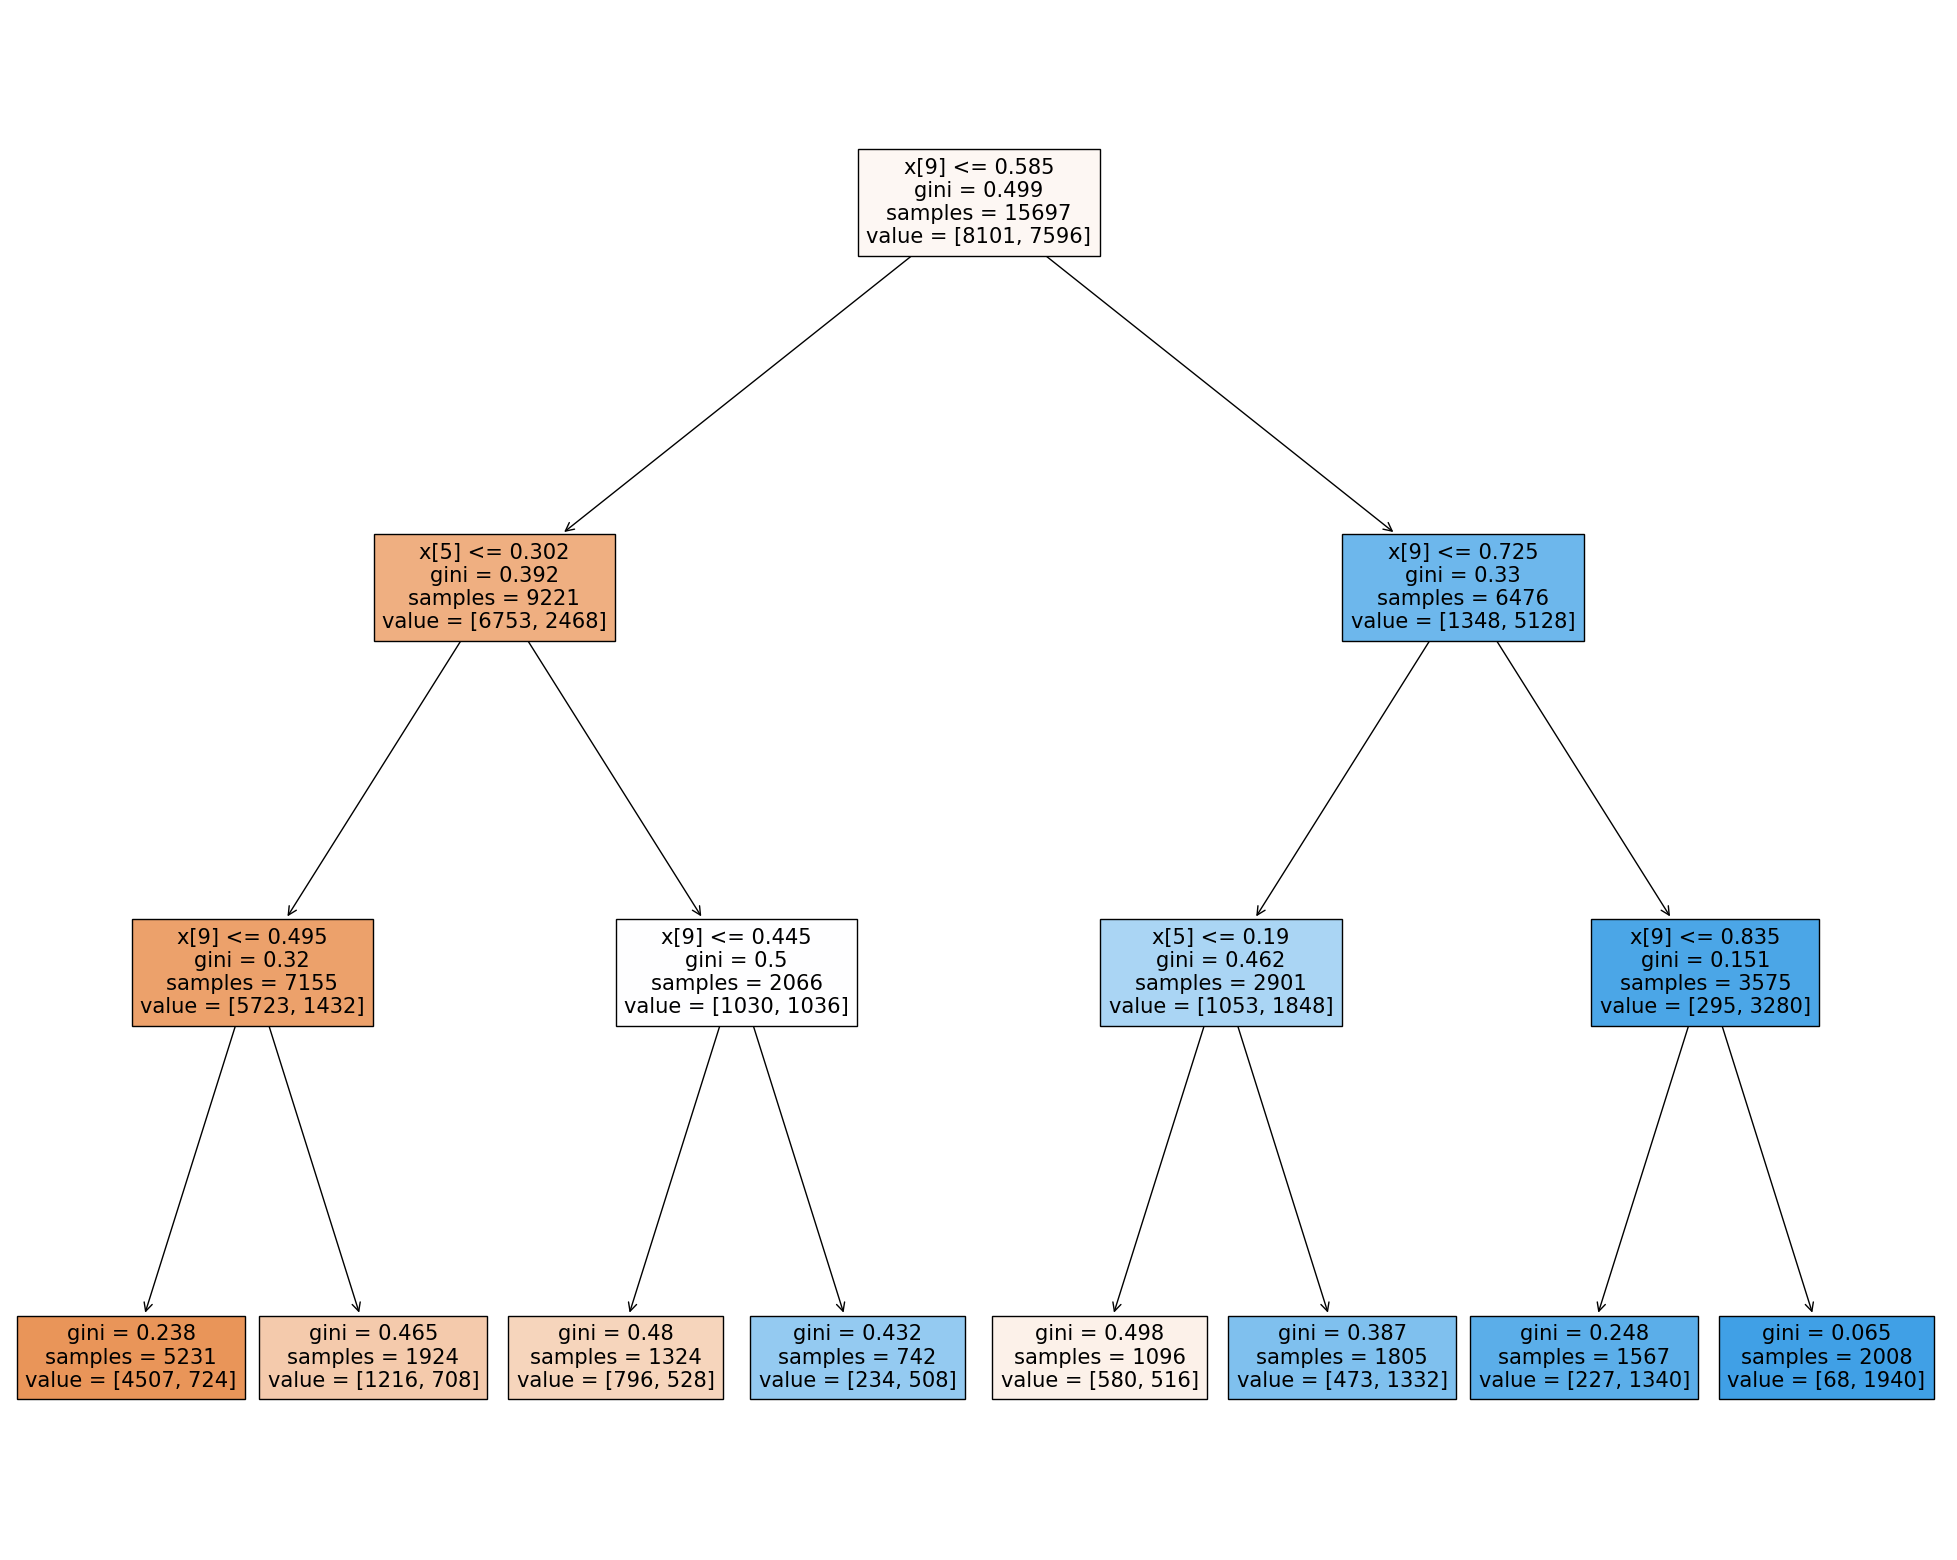

In [31]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=None, class_names=None, filled=True)

In [32]:
from sklearn.tree import DecisionTreeRegressor

data_regressor = pd.read_csv("D:\ML\data\data.csv", delimiter=',')

y_reg = data_regressor["quality"]
X_reg = data_regressor.drop(["quality"], axis=1)

reg = DecisionTreeRegressor(max_depth=3)
reg.fit(X_reg, y_reg)

DecisionTreeRegressor(max_depth=3)

In [33]:
text_representation = tree.export_text(reg)
print(text_representation)

|--- feature_10 <= 10.62
|   |--- feature_1 <= 0.25
|   |   |--- feature_1 <= 0.21
|   |   |   |--- value: [5.92]
|   |   |--- feature_1 >  0.21
|   |   |   |--- value: [5.66]
|   |--- feature_1 >  0.25
|   |   |--- feature_10 <= 9.85
|   |   |   |--- value: [5.24]
|   |   |--- feature_10 >  9.85
|   |   |   |--- value: [5.52]
|--- feature_10 >  10.62
|   |--- feature_10 <= 11.74
|   |   |--- feature_2 <= 0.24
|   |   |   |--- value: [5.56]
|   |   |--- feature_2 >  0.24
|   |   |   |--- value: [6.11]
|   |--- feature_10 >  11.74
|   |   |--- feature_5 <= 21.50
|   |   |   |--- value: [6.25]
|   |   |--- feature_5 >  21.50
|   |   |   |--- value: [6.64]



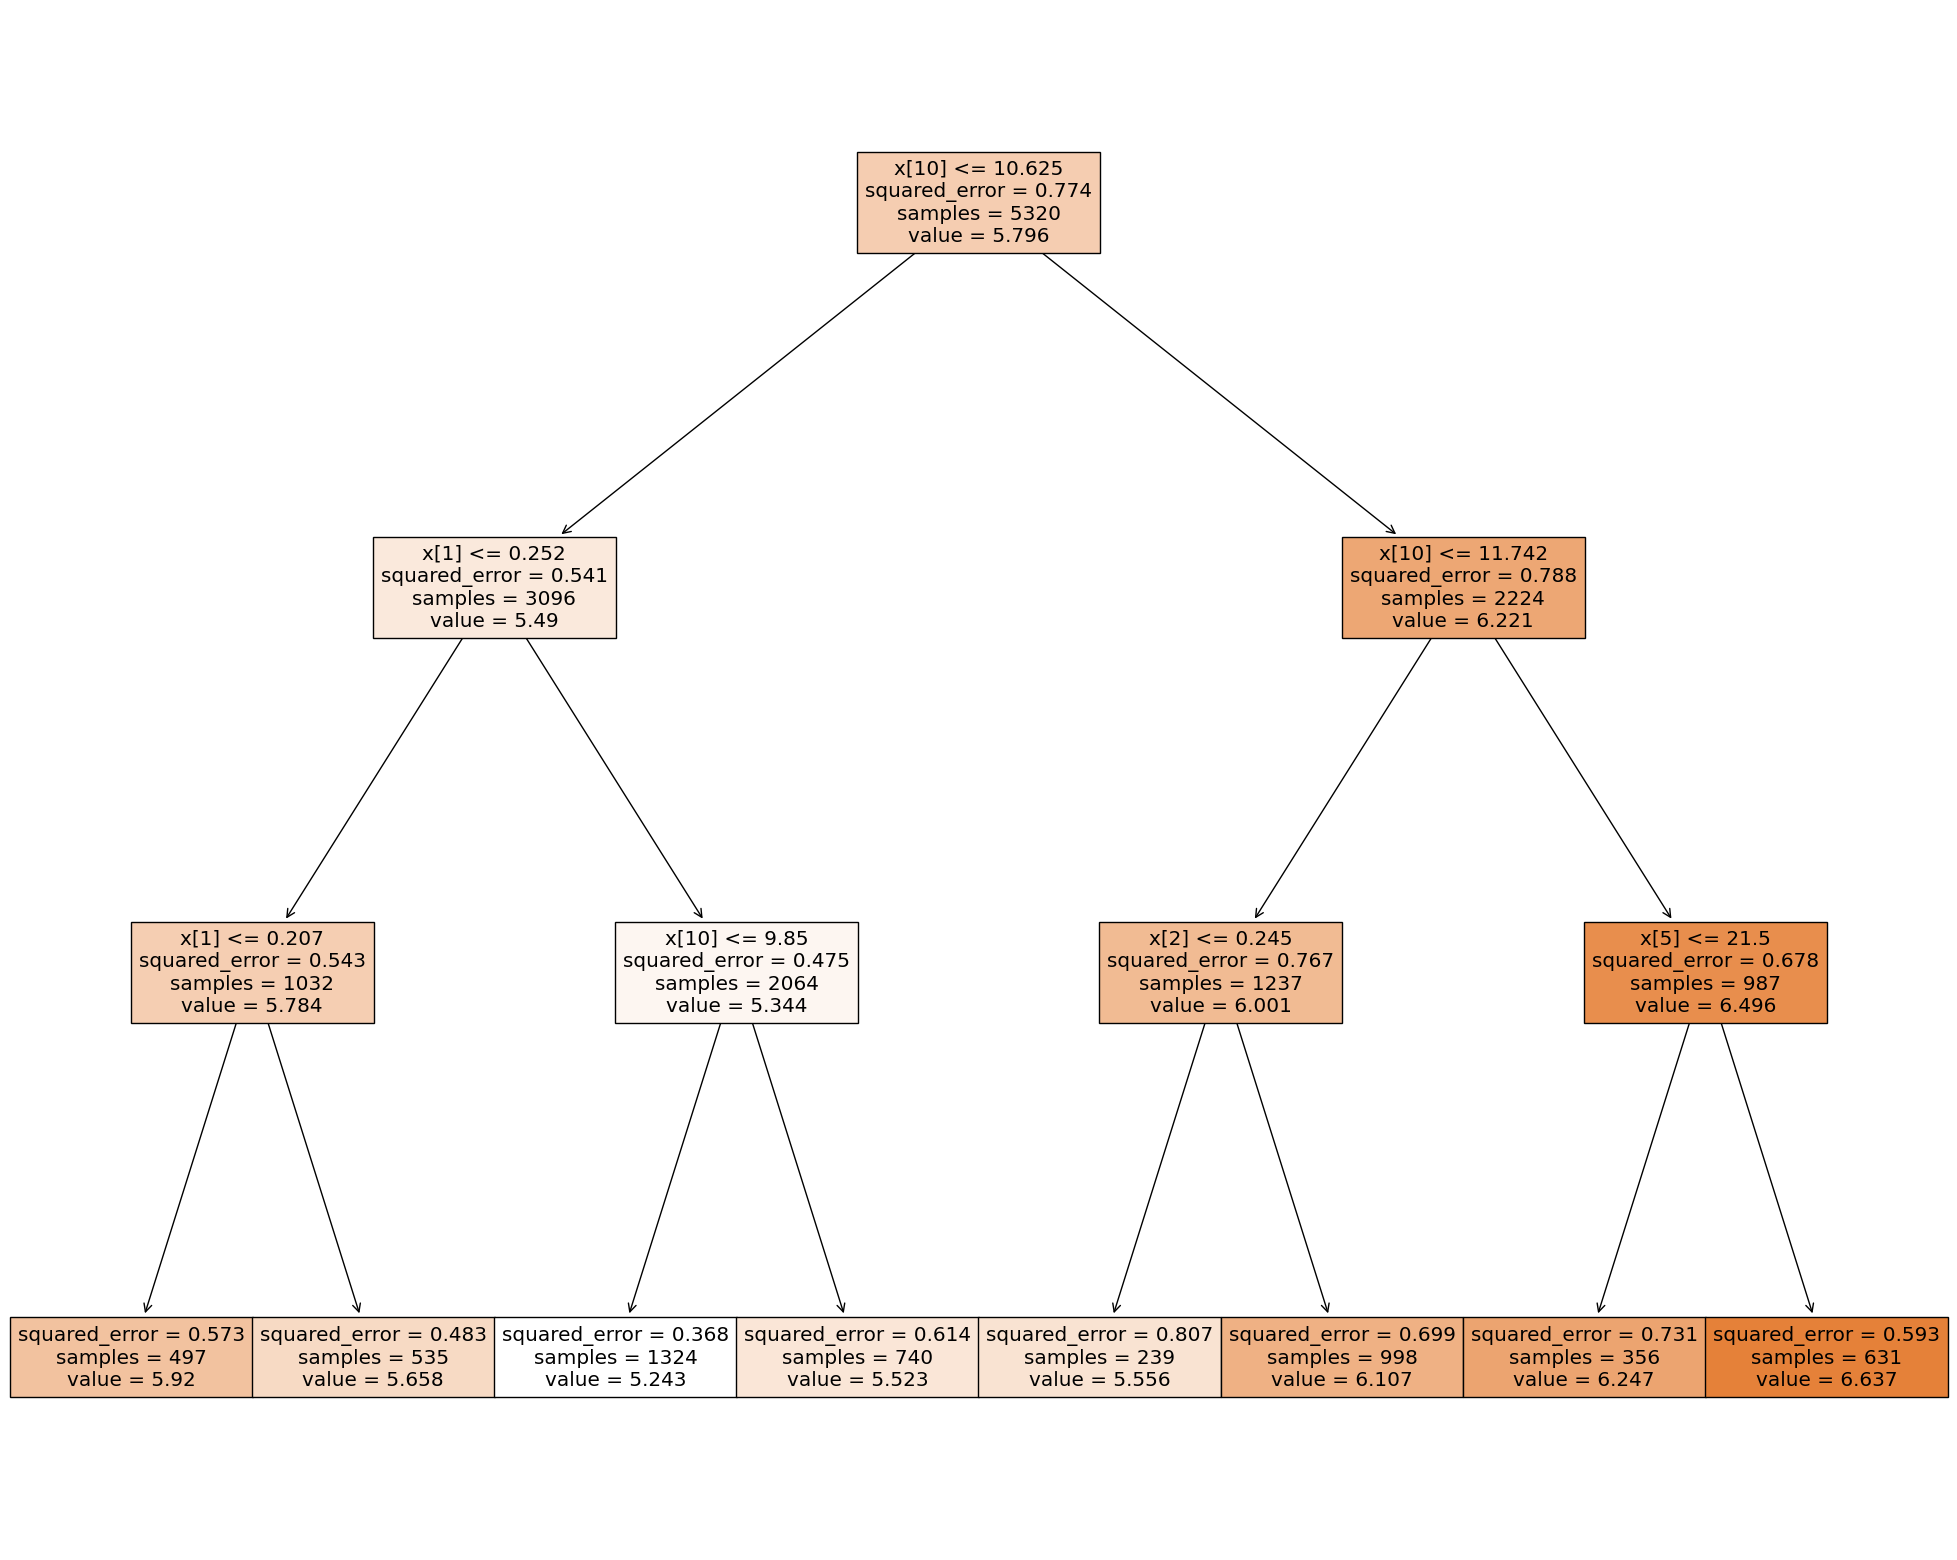

In [34]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(reg, feature_names=None, filled=True)

In [35]:
from sklearn.model_selection import train_test_split

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_class, y_class, test_size=0.2, random_state = 42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state = 42)

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

regf = BaggingRegressor(base_estimator=RandomForestRegressor(n_estimators=10), n_estimators=10, random_state=0)
regf.fit(X_train_reg, y_train_reg)

D:\ML\venv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=RandomForestRegressor(n_estimators=10),
                 random_state=0)

In [37]:
y_pred_reg = regf.predict(X_test_reg)

print(f'MAE: {mean_absolute_error(y_test_reg, y_pred_reg)}')
print(f'MSE: {mean_squared_error(y_test_reg, y_pred_reg)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_reg, y_pred_reg))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test_reg, y_pred_reg))}')
print(f'R^2: {regf.score(X_test_reg, y_test_reg)}')

MAE: 0.5184304511278196
MSE: 0.4506269736842105
RMSE: 0.671287549180089
MAPE: 0.3043609995761853
R^2: 0.4006597879911795


In [38]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(random_state=0)
gb_reg.fit(X_train_reg, y_train_reg)

GradientBoostingRegressor(random_state=0)

In [39]:
y_pred_gb = gb_reg.predict(X_test_reg)

print(f'MAE: {mean_absolute_error(y_test_reg, y_pred_reg)}')
print(f'MSE: {mean_squared_error(y_test_reg, y_pred_reg)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_reg, y_pred_reg))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test_reg, y_pred_gb))}')
print(f'R^2: {gb_reg.score(X_test_reg, y_test_reg)}')

MAE: 0.5184304511278196
MSE: 0.4506269736842105
RMSE: 0.671287549180089
MAPE: 0.30703833093655836
R^2: 0.3742799496075483


In [40]:
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import StackingRegressor

estimators = [('lr', RidgeCV()), ('svr', LinearSVR(random_state=42))]
reg_stc = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor(n_estimators=10, random_state=42))
reg_stc.fit(X_train_reg, y_train_reg)

D:\ML\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\ML\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\ML\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\ML\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\ML\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\ML\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


StackingRegressor(estimators=[('lr', RidgeCV()),
                              ('svr', LinearSVR(random_state=42))],
                  final_estimator=RandomForestRegressor(n_estimators=10,
                                                        random_state=42))

In [41]:
y_pred_stc = reg_stc.predict(X_test_reg)

print(f'MAE: {mean_absolute_error(y_test_reg, y_pred_stc)}')
print(f'MSE: {mean_squared_error(y_test_reg, y_pred_stc)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_reg, y_pred_stc))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test_reg, y_pred_stc))}')
print(f'R^2: {regf.score(X_test_reg, y_test_reg)}')

MAE: 0.687593984962406
MSE: 0.7962406015037594
RMSE: 0.8923231485867434
MAPE: 0.3479648282814933
R^2: 0.4006597879911795


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

bagclf = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators = 10), n_estimators=10, random_state=0)
bagclf.fit(X_train_clf, y_train_clf)

D:\ML\venv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=10),
                  random_state=0)

In [43]:
y_pred_bag = bagclf.predict(X_test_clf)
print(classification_report(y_test_clf, y_pred_bag))

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95      1652
         1.0       0.90      1.00      0.95      1488

    accuracy                           0.95      3140
   macro avg       0.95      0.95      0.95      3140
weighted avg       0.95      0.95      0.95      3140



In [44]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb_clf.fit(X_train_clf, y_train_clf)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [45]:
y_pred_gb = gb_clf.predict(X_test_clf)
print(classification_report(y_test_clf, y_pred_gb))

              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84      1652
         1.0       0.83      0.79      0.81      1488

    accuracy                           0.82      3140
   macro avg       0.82      0.82      0.82      3140
weighted avg       0.82      0.82      0.82      3140



In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

estimators = [
            ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
            ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))]

clf_stc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf_stc.fit(X_train_clf, y_train_clf)

D:\ML\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\ML\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\ML\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\ML\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\ML\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\ML\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svr',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc',
                                                 LinearSVC(random_state=42))]))],
                   final_estimator=LogisticRegression())

In [47]:
y_pred_stc = clf_stc.predict(X_test_clf)
print(classification_report(y_test_clf, y_pred_stc))

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98      1652
         1.0       0.96      0.99      0.98      1488

    accuracy                           0.98      3140
   macro avg       0.98      0.98      0.98      3140
weighted avg       0.98      0.98      0.98      3140



In [48]:
from catboost import CatBoostRegressor

cat_reg = CatBoostRegressor()
cat_reg.fit(X_train_reg, y_train_reg)

Learning rate set to 0.051471
0:	learn: 0.8719694	total: 2.86ms	remaining: 2.86s
1:	learn: 0.8609427	total: 5.37ms	remaining: 2.68s
2:	learn: 0.8509358	total: 8.06ms	remaining: 2.68s
3:	learn: 0.8409104	total: 11.1ms	remaining: 2.76s
4:	learn: 0.8330485	total: 13.2ms	remaining: 2.62s
5:	learn: 0.8252046	total: 15.7ms	remaining: 2.6s
6:	learn: 0.8175344	total: 18.2ms	remaining: 2.58s
7:	learn: 0.8099771	total: 20.5ms	remaining: 2.54s
8:	learn: 0.8028720	total: 22.9ms	remaining: 2.52s
9:	learn: 0.7962489	total: 25.3ms	remaining: 2.5s
10:	learn: 0.7906537	total: 27.4ms	remaining: 2.47s
11:	learn: 0.7857996	total: 29.6ms	remaining: 2.44s
12:	learn: 0.7806564	total: 32.2ms	remaining: 2.45s
13:	learn: 0.7750538	total: 34.6ms	remaining: 2.44s
14:	learn: 0.7704395	total: 37.1ms	remaining: 2.44s
15:	learn: 0.7663858	total: 39.7ms	remaining: 2.44s
16:	learn: 0.7625335	total: 41.9ms	remaining: 2.42s
17:	learn: 0.7591741	total: 44.1ms	remaining: 2.41s
18:	learn: 0.7555164	total: 46.5ms	remaining: 

162:	learn: 0.6487649	total: 363ms	remaining: 1.86s
163:	learn: 0.6485069	total: 366ms	remaining: 1.86s
164:	learn: 0.6481983	total: 368ms	remaining: 1.86s
165:	learn: 0.6480966	total: 370ms	remaining: 1.86s
166:	learn: 0.6477725	total: 372ms	remaining: 1.86s
167:	learn: 0.6473697	total: 375ms	remaining: 1.86s
168:	learn: 0.6471426	total: 377ms	remaining: 1.85s
169:	learn: 0.6469106	total: 380ms	remaining: 1.85s
170:	learn: 0.6468236	total: 382ms	remaining: 1.85s
171:	learn: 0.6465266	total: 384ms	remaining: 1.85s
172:	learn: 0.6462965	total: 386ms	remaining: 1.85s
173:	learn: 0.6461322	total: 388ms	remaining: 1.84s
174:	learn: 0.6456920	total: 391ms	remaining: 1.84s
175:	learn: 0.6451518	total: 394ms	remaining: 1.84s
176:	learn: 0.6449684	total: 396ms	remaining: 1.84s
177:	learn: 0.6442698	total: 398ms	remaining: 1.84s
178:	learn: 0.6439660	total: 400ms	remaining: 1.84s
179:	learn: 0.6435922	total: 402ms	remaining: 1.83s
180:	learn: 0.6430031	total: 405ms	remaining: 1.83s
181:	learn: 

341:	learn: 0.5969366	total: 751ms	remaining: 1.45s
342:	learn: 0.5964732	total: 754ms	remaining: 1.44s
343:	learn: 0.5962870	total: 756ms	remaining: 1.44s
344:	learn: 0.5962681	total: 758ms	remaining: 1.44s
345:	learn: 0.5959705	total: 760ms	remaining: 1.44s
346:	learn: 0.5959533	total: 762ms	remaining: 1.43s
347:	learn: 0.5959319	total: 764ms	remaining: 1.43s
348:	learn: 0.5955765	total: 767ms	remaining: 1.43s
349:	learn: 0.5955594	total: 769ms	remaining: 1.43s
350:	learn: 0.5951891	total: 771ms	remaining: 1.43s
351:	learn: 0.5951408	total: 773ms	remaining: 1.42s
352:	learn: 0.5948636	total: 775ms	remaining: 1.42s
353:	learn: 0.5945381	total: 777ms	remaining: 1.42s
354:	learn: 0.5944123	total: 779ms	remaining: 1.42s
355:	learn: 0.5938718	total: 781ms	remaining: 1.41s
356:	learn: 0.5937278	total: 783ms	remaining: 1.41s
357:	learn: 0.5930683	total: 786ms	remaining: 1.41s
358:	learn: 0.5924066	total: 788ms	remaining: 1.41s
359:	learn: 0.5921524	total: 790ms	remaining: 1.41s
360:	learn: 

515:	learn: 0.5552618	total: 1.14s	remaining: 1.06s
516:	learn: 0.5551131	total: 1.14s	remaining: 1.06s
517:	learn: 0.5550321	total: 1.14s	remaining: 1.06s
518:	learn: 0.5549480	total: 1.14s	remaining: 1.06s
519:	learn: 0.5546998	total: 1.15s	remaining: 1.06s
520:	learn: 0.5546846	total: 1.15s	remaining: 1.05s
521:	learn: 0.5544772	total: 1.15s	remaining: 1.05s
522:	learn: 0.5542142	total: 1.15s	remaining: 1.05s
523:	learn: 0.5542029	total: 1.15s	remaining: 1.05s
524:	learn: 0.5540191	total: 1.16s	remaining: 1.05s
525:	learn: 0.5535830	total: 1.16s	remaining: 1.04s
526:	learn: 0.5533608	total: 1.16s	remaining: 1.04s
527:	learn: 0.5532877	total: 1.16s	remaining: 1.04s
528:	learn: 0.5528498	total: 1.17s	remaining: 1.04s
529:	learn: 0.5526536	total: 1.17s	remaining: 1.03s
530:	learn: 0.5524656	total: 1.17s	remaining: 1.03s
531:	learn: 0.5524483	total: 1.17s	remaining: 1.03s
532:	learn: 0.5521965	total: 1.17s	remaining: 1.03s
533:	learn: 0.5517012	total: 1.18s	remaining: 1.03s
534:	learn: 

686:	learn: 0.5184271	total: 1.52s	remaining: 693ms
687:	learn: 0.5181956	total: 1.52s	remaining: 691ms
688:	learn: 0.5180278	total: 1.52s	remaining: 689ms
689:	learn: 0.5179151	total: 1.53s	remaining: 686ms
690:	learn: 0.5177945	total: 1.53s	remaining: 684ms
691:	learn: 0.5176123	total: 1.53s	remaining: 682ms
692:	learn: 0.5172108	total: 1.53s	remaining: 680ms
693:	learn: 0.5169518	total: 1.54s	remaining: 678ms
694:	learn: 0.5167438	total: 1.54s	remaining: 676ms
695:	learn: 0.5164532	total: 1.54s	remaining: 674ms
696:	learn: 0.5164394	total: 1.54s	remaining: 671ms
697:	learn: 0.5163546	total: 1.55s	remaining: 669ms
698:	learn: 0.5160694	total: 1.55s	remaining: 667ms
699:	learn: 0.5159660	total: 1.55s	remaining: 665ms
700:	learn: 0.5157758	total: 1.55s	remaining: 662ms
701:	learn: 0.5155938	total: 1.55s	remaining: 660ms
702:	learn: 0.5154972	total: 1.56s	remaining: 658ms
703:	learn: 0.5152594	total: 1.56s	remaining: 656ms
704:	learn: 0.5149748	total: 1.56s	remaining: 654ms
705:	learn: 

859:	learn: 0.4884879	total: 1.91s	remaining: 310ms
860:	learn: 0.4882578	total: 1.91s	remaining: 308ms
861:	learn: 0.4880840	total: 1.91s	remaining: 306ms
862:	learn: 0.4878337	total: 1.91s	remaining: 304ms
863:	learn: 0.4875991	total: 1.92s	remaining: 302ms
864:	learn: 0.4875750	total: 1.92s	remaining: 299ms
865:	learn: 0.4875038	total: 1.92s	remaining: 297ms
866:	learn: 0.4873231	total: 1.92s	remaining: 295ms
867:	learn: 0.4870441	total: 1.93s	remaining: 293ms
868:	learn: 0.4868932	total: 1.93s	remaining: 291ms
869:	learn: 0.4865840	total: 1.93s	remaining: 288ms
870:	learn: 0.4862261	total: 1.93s	remaining: 286ms
871:	learn: 0.4860726	total: 1.93s	remaining: 284ms
872:	learn: 0.4858537	total: 1.94s	remaining: 282ms
873:	learn: 0.4857311	total: 1.94s	remaining: 279ms
874:	learn: 0.4856569	total: 1.94s	remaining: 277ms
875:	learn: 0.4856188	total: 1.94s	remaining: 275ms
876:	learn: 0.4855044	total: 1.94s	remaining: 273ms
877:	learn: 0.4853495	total: 1.95s	remaining: 270ms
878:	learn: 

In [49]:
y_pred_creg = cat_reg.predict(X_test_reg)

print(f'MAE: {mean_absolute_error(y_test_reg, y_pred_creg)}')
print(f'MSE: {mean_squared_error(y_test_reg, y_pred_creg)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_reg, y_pred_creg))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test_reg, y_pred_creg))}')
print(f'R^2: {regf.score(X_test_reg, y_test_reg)}')

MAE: 0.5172176187868188
MSE: 0.4495186693724706
RMSE: 0.670461534595737
MAPE: 0.3037162850442114
R^2: 0.4006597879911795


In [50]:
from catboost import CatBoostClassifier

cat_clf = CatBoostClassifier()
cat_clf.fit(X_train_clf, y_train_clf)

Learning rate set to 0.03035
0:	learn: 0.6780486	total: 10.1ms	remaining: 10.1s
1:	learn: 0.6626503	total: 18.8ms	remaining: 9.39s
2:	learn: 0.6493118	total: 27.3ms	remaining: 9.07s
3:	learn: 0.6368040	total: 37ms	remaining: 9.22s
4:	learn: 0.6245585	total: 46.6ms	remaining: 9.27s
5:	learn: 0.6127507	total: 56.1ms	remaining: 9.3s
6:	learn: 0.6026282	total: 65.1ms	remaining: 9.23s
7:	learn: 0.5917573	total: 74.9ms	remaining: 9.29s
8:	learn: 0.5822671	total: 84.1ms	remaining: 9.26s
9:	learn: 0.5743384	total: 93.1ms	remaining: 9.22s
10:	learn: 0.5665293	total: 102ms	remaining: 9.21s
11:	learn: 0.5585416	total: 111ms	remaining: 9.15s
12:	learn: 0.5508519	total: 121ms	remaining: 9.18s
13:	learn: 0.5437389	total: 129ms	remaining: 9.1s
14:	learn: 0.5375947	total: 141ms	remaining: 9.25s
15:	learn: 0.5316496	total: 151ms	remaining: 9.28s
16:	learn: 0.5256792	total: 160ms	remaining: 9.23s
17:	learn: 0.5212823	total: 168ms	remaining: 9.18s
18:	learn: 0.5162115	total: 177ms	remaining: 9.13s
19:	le

167:	learn: 0.3601652	total: 1.58s	remaining: 7.81s
168:	learn: 0.3597717	total: 1.58s	remaining: 7.8s
169:	learn: 0.3592180	total: 1.6s	remaining: 7.79s
170:	learn: 0.3588968	total: 1.6s	remaining: 7.78s
171:	learn: 0.3586275	total: 1.61s	remaining: 7.77s
172:	learn: 0.3582872	total: 1.62s	remaining: 7.76s
173:	learn: 0.3578511	total: 1.63s	remaining: 7.75s
174:	learn: 0.3574019	total: 1.64s	remaining: 7.74s
175:	learn: 0.3570709	total: 1.65s	remaining: 7.72s
176:	learn: 0.3567913	total: 1.66s	remaining: 7.71s
177:	learn: 0.3564057	total: 1.67s	remaining: 7.7s
178:	learn: 0.3560504	total: 1.68s	remaining: 7.69s
179:	learn: 0.3558313	total: 1.68s	remaining: 7.67s
180:	learn: 0.3553944	total: 1.69s	remaining: 7.66s
181:	learn: 0.3550715	total: 1.7s	remaining: 7.65s
182:	learn: 0.3547351	total: 1.71s	remaining: 7.64s
183:	learn: 0.3544176	total: 1.72s	remaining: 7.63s
184:	learn: 0.3540280	total: 1.73s	remaining: 7.61s
185:	learn: 0.3536129	total: 1.74s	remaining: 7.6s
186:	learn: 0.3531

345:	learn: 0.3045528	total: 3.18s	remaining: 6.01s
346:	learn: 0.3041398	total: 3.19s	remaining: 6.01s
347:	learn: 0.3038057	total: 3.2s	remaining: 6s
348:	learn: 0.3035253	total: 3.21s	remaining: 5.99s
349:	learn: 0.3032730	total: 3.22s	remaining: 5.98s
350:	learn: 0.3029656	total: 3.23s	remaining: 5.97s
351:	learn: 0.3026067	total: 3.24s	remaining: 5.96s
352:	learn: 0.3023312	total: 3.25s	remaining: 5.95s
353:	learn: 0.3019486	total: 3.26s	remaining: 5.94s
354:	learn: 0.3016114	total: 3.27s	remaining: 5.93s
355:	learn: 0.3013272	total: 3.27s	remaining: 5.93s
356:	learn: 0.3010713	total: 3.28s	remaining: 5.92s
357:	learn: 0.3008751	total: 3.29s	remaining: 5.91s
358:	learn: 0.3005182	total: 3.3s	remaining: 5.9s
359:	learn: 0.3002853	total: 3.31s	remaining: 5.89s
360:	learn: 0.2999306	total: 3.32s	remaining: 5.88s
361:	learn: 0.2994961	total: 3.33s	remaining: 5.87s
362:	learn: 0.2993215	total: 3.34s	remaining: 5.86s
363:	learn: 0.2990294	total: 3.35s	remaining: 5.85s
364:	learn: 0.2987

508:	learn: 0.2610826	total: 4.63s	remaining: 4.47s
509:	learn: 0.2608652	total: 4.64s	remaining: 4.46s
510:	learn: 0.2605855	total: 4.65s	remaining: 4.45s
511:	learn: 0.2603233	total: 4.66s	remaining: 4.44s
512:	learn: 0.2601456	total: 4.67s	remaining: 4.43s
513:	learn: 0.2599032	total: 4.68s	remaining: 4.42s
514:	learn: 0.2596137	total: 4.69s	remaining: 4.42s
515:	learn: 0.2593602	total: 4.7s	remaining: 4.41s
516:	learn: 0.2590648	total: 4.71s	remaining: 4.4s
517:	learn: 0.2587215	total: 4.71s	remaining: 4.39s
518:	learn: 0.2585591	total: 4.72s	remaining: 4.38s
519:	learn: 0.2583024	total: 4.73s	remaining: 4.37s
520:	learn: 0.2581315	total: 4.74s	remaining: 4.36s
521:	learn: 0.2578591	total: 4.75s	remaining: 4.35s
522:	learn: 0.2575886	total: 4.76s	remaining: 4.34s
523:	learn: 0.2574094	total: 4.77s	remaining: 4.33s
524:	learn: 0.2572031	total: 4.78s	remaining: 4.32s
525:	learn: 0.2568399	total: 4.79s	remaining: 4.31s
526:	learn: 0.2566819	total: 4.79s	remaining: 4.3s
527:	learn: 0.2

667:	learn: 0.2267483	total: 6.07s	remaining: 3.02s
668:	learn: 0.2265457	total: 6.08s	remaining: 3.01s
669:	learn: 0.2263643	total: 6.09s	remaining: 3s
670:	learn: 0.2261906	total: 6.1s	remaining: 2.99s
671:	learn: 0.2259974	total: 6.11s	remaining: 2.98s
672:	learn: 0.2257264	total: 6.12s	remaining: 2.97s
673:	learn: 0.2255000	total: 6.13s	remaining: 2.96s
674:	learn: 0.2253208	total: 6.14s	remaining: 2.95s
675:	learn: 0.2251244	total: 6.14s	remaining: 2.94s
676:	learn: 0.2249278	total: 6.15s	remaining: 2.94s
677:	learn: 0.2247718	total: 6.16s	remaining: 2.93s
678:	learn: 0.2245231	total: 6.17s	remaining: 2.92s
679:	learn: 0.2243235	total: 6.18s	remaining: 2.91s
680:	learn: 0.2241914	total: 6.19s	remaining: 2.9s
681:	learn: 0.2239910	total: 6.2s	remaining: 2.89s
682:	learn: 0.2237942	total: 6.21s	remaining: 2.88s
683:	learn: 0.2236457	total: 6.21s	remaining: 2.87s
684:	learn: 0.2234195	total: 6.22s	remaining: 2.86s
685:	learn: 0.2232399	total: 6.23s	remaining: 2.85s
686:	learn: 0.2230

827:	learn: 0.1985886	total: 7.5s	remaining: 1.56s
828:	learn: 0.1984322	total: 7.5s	remaining: 1.55s
829:	learn: 0.1982311	total: 7.52s	remaining: 1.54s
830:	learn: 0.1981019	total: 7.53s	remaining: 1.53s
831:	learn: 0.1979853	total: 7.54s	remaining: 1.52s
832:	learn: 0.1978570	total: 7.55s	remaining: 1.51s
833:	learn: 0.1976869	total: 7.56s	remaining: 1.5s
834:	learn: 0.1975376	total: 7.57s	remaining: 1.5s
835:	learn: 0.1973249	total: 7.58s	remaining: 1.49s
836:	learn: 0.1971452	total: 7.58s	remaining: 1.48s
837:	learn: 0.1970522	total: 7.59s	remaining: 1.47s
838:	learn: 0.1968520	total: 7.6s	remaining: 1.46s
839:	learn: 0.1967153	total: 7.61s	remaining: 1.45s
840:	learn: 0.1965805	total: 7.62s	remaining: 1.44s
841:	learn: 0.1964189	total: 7.63s	remaining: 1.43s
842:	learn: 0.1962676	total: 7.64s	remaining: 1.42s
843:	learn: 0.1961613	total: 7.64s	remaining: 1.41s
844:	learn: 0.1959047	total: 7.65s	remaining: 1.4s
845:	learn: 0.1956874	total: 7.66s	remaining: 1.4s
846:	learn: 0.19552

In [51]:
y_pred_cclf = cat_clf.predict(X_test_clf)
print(classification_report(y_test_clf, y_pred_cclf))

              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92      1652
         1.0       0.89      0.95      0.92      1488

    accuracy                           0.92      3140
   macro avg       0.92      0.92      0.92      3140
weighted avg       0.92      0.92      0.92      3140



In [52]:
import sys
sys.path.append('D:\ML\mylib')
import Begging

bc = BeggingClassifier(n_folds=5, model = CatBoostClassifier())
x = bc.Data_split(X_train_clf, y_train_clf)
y = bc.Algorithm(x, X_test_clf)
y_pred = bc.Predict(y)
print(classification_report(y_test_clf, y_pred))

C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users

C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users

C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users

C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users

C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users

C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users

C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users

C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users

C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users

C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users

C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users

C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users

C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users

Learning rate set to 0.010302
0:	learn: 0.6890174	total: 4.55ms	remaining: 4.54s
1:	learn: 0.6849104	total: 9.58ms	remaining: 4.78s
2:	learn: 0.6798592	total: 14.4ms	remaining: 4.77s
3:	learn: 0.6753471	total: 17.8ms	remaining: 4.43s
4:	learn: 0.6701734	total: 22ms	remaining: 4.38s
5:	learn: 0.6660768	total: 24.9ms	remaining: 4.12s
6:	learn: 0.6613656	total: 29.5ms	remaining: 4.18s
7:	learn: 0.6574097	total: 32.7ms	remaining: 4.06s
8:	learn: 0.6533656	total: 35.8ms	remaining: 3.94s
9:	learn: 0.6493320	total: 38.7ms	remaining: 3.83s
10:	learn: 0.6454661	total: 41.8ms	remaining: 3.76s
11:	learn: 0.6414845	total: 45.1ms	remaining: 3.71s
12:	learn: 0.6376545	total: 48.1ms	remaining: 3.65s
13:	learn: 0.6334899	total: 51.4ms	remaining: 3.62s
14:	learn: 0.6297690	total: 54.5ms	remaining: 3.58s
15:	learn: 0.6260514	total: 57.5ms	remaining: 3.54s
16:	learn: 0.6229194	total: 61.4ms	remaining: 3.55s
17:	learn: 0.6191664	total: 64.9ms	remaining: 3.54s
18:	learn: 0.6159781	total: 67.8ms	remaining: 

198:	learn: 0.3831543	total: 597ms	remaining: 2.4s
199:	learn: 0.3826080	total: 601ms	remaining: 2.4s
200:	learn: 0.3818792	total: 603ms	remaining: 2.4s
201:	learn: 0.3815329	total: 606ms	remaining: 2.4s
202:	learn: 0.3811218	total: 609ms	remaining: 2.39s
203:	learn: 0.3803050	total: 612ms	remaining: 2.39s
204:	learn: 0.3798624	total: 614ms	remaining: 2.38s
205:	learn: 0.3793251	total: 617ms	remaining: 2.38s
206:	learn: 0.3789153	total: 620ms	remaining: 2.38s
207:	learn: 0.3785926	total: 623ms	remaining: 2.37s
208:	learn: 0.3781006	total: 625ms	remaining: 2.37s
209:	learn: 0.3776647	total: 628ms	remaining: 2.36s
210:	learn: 0.3771333	total: 631ms	remaining: 2.36s
211:	learn: 0.3766670	total: 634ms	remaining: 2.35s
212:	learn: 0.3761650	total: 637ms	remaining: 2.35s
213:	learn: 0.3757436	total: 640ms	remaining: 2.35s
214:	learn: 0.3750141	total: 643ms	remaining: 2.35s
215:	learn: 0.3746325	total: 647ms	remaining: 2.35s
216:	learn: 0.3743111	total: 649ms	remaining: 2.34s
217:	learn: 0.37

412:	learn: 0.3026674	total: 1.19s	remaining: 1.69s
413:	learn: 0.3024025	total: 1.19s	remaining: 1.69s
414:	learn: 0.3018379	total: 1.2s	remaining: 1.69s
415:	learn: 0.3015444	total: 1.2s	remaining: 1.69s
416:	learn: 0.3011416	total: 1.2s	remaining: 1.68s
417:	learn: 0.3007218	total: 1.21s	remaining: 1.68s
418:	learn: 0.3003177	total: 1.21s	remaining: 1.68s
419:	learn: 0.2999922	total: 1.21s	remaining: 1.68s
420:	learn: 0.2997524	total: 1.22s	remaining: 1.67s
421:	learn: 0.2994393	total: 1.22s	remaining: 1.67s
422:	learn: 0.2992777	total: 1.22s	remaining: 1.67s
423:	learn: 0.2989916	total: 1.22s	remaining: 1.66s
424:	learn: 0.2986669	total: 1.23s	remaining: 1.66s
425:	learn: 0.2983684	total: 1.23s	remaining: 1.66s
426:	learn: 0.2981791	total: 1.23s	remaining: 1.65s
427:	learn: 0.2978427	total: 1.23s	remaining: 1.65s
428:	learn: 0.2975683	total: 1.24s	remaining: 1.65s
429:	learn: 0.2973109	total: 1.24s	remaining: 1.64s
430:	learn: 0.2970079	total: 1.24s	remaining: 1.64s
431:	learn: 0.2

622:	learn: 0.2472763	total: 1.78s	remaining: 1.08s
623:	learn: 0.2470755	total: 1.78s	remaining: 1.07s
624:	learn: 0.2469697	total: 1.79s	remaining: 1.07s
625:	learn: 0.2468168	total: 1.79s	remaining: 1.07s
626:	learn: 0.2466844	total: 1.79s	remaining: 1.07s
627:	learn: 0.2463341	total: 1.79s	remaining: 1.06s
628:	learn: 0.2459518	total: 1.8s	remaining: 1.06s
629:	learn: 0.2456537	total: 1.8s	remaining: 1.06s
630:	learn: 0.2454079	total: 1.8s	remaining: 1.05s
631:	learn: 0.2450322	total: 1.81s	remaining: 1.05s
632:	learn: 0.2447833	total: 1.81s	remaining: 1.05s
633:	learn: 0.2445711	total: 1.81s	remaining: 1.05s
634:	learn: 0.2442881	total: 1.82s	remaining: 1.04s
635:	learn: 0.2439375	total: 1.82s	remaining: 1.04s
636:	learn: 0.2436881	total: 1.82s	remaining: 1.04s
637:	learn: 0.2434467	total: 1.82s	remaining: 1.03s
638:	learn: 0.2431199	total: 1.83s	remaining: 1.03s
639:	learn: 0.2427984	total: 1.83s	remaining: 1.03s
640:	learn: 0.2424146	total: 1.83s	remaining: 1.03s
641:	learn: 0.2

830:	learn: 0.1981901	total: 2.35s	remaining: 478ms
831:	learn: 0.1980348	total: 2.35s	remaining: 476ms
832:	learn: 0.1978035	total: 2.36s	remaining: 473ms
833:	learn: 0.1975663	total: 2.36s	remaining: 470ms
834:	learn: 0.1972980	total: 2.36s	remaining: 467ms
835:	learn: 0.1972570	total: 2.37s	remaining: 464ms
836:	learn: 0.1971380	total: 2.37s	remaining: 461ms
837:	learn: 0.1967808	total: 2.37s	remaining: 459ms
838:	learn: 0.1967073	total: 2.38s	remaining: 456ms
839:	learn: 0.1965712	total: 2.38s	remaining: 453ms
840:	learn: 0.1963475	total: 2.38s	remaining: 450ms
841:	learn: 0.1961143	total: 2.38s	remaining: 447ms
842:	learn: 0.1960168	total: 2.39s	remaining: 445ms
843:	learn: 0.1956515	total: 2.39s	remaining: 442ms
844:	learn: 0.1953620	total: 2.39s	remaining: 439ms
845:	learn: 0.1953429	total: 2.4s	remaining: 436ms
846:	learn: 0.1951269	total: 2.4s	remaining: 433ms
847:	learn: 0.1948233	total: 2.4s	remaining: 430ms
848:	learn: 0.1946328	total: 2.4s	remaining: 427ms
849:	learn: 0.19

29:	learn: 0.5832012	total: 89.2ms	remaining: 2.88s
30:	learn: 0.5803317	total: 92.2ms	remaining: 2.88s
31:	learn: 0.5778391	total: 95.3ms	remaining: 2.88s
32:	learn: 0.5753063	total: 98.4ms	remaining: 2.88s
33:	learn: 0.5729600	total: 101ms	remaining: 2.88s
34:	learn: 0.5699786	total: 104ms	remaining: 2.88s
35:	learn: 0.5677660	total: 107ms	remaining: 2.87s
36:	learn: 0.5650216	total: 110ms	remaining: 2.87s
37:	learn: 0.5623529	total: 113ms	remaining: 2.87s
38:	learn: 0.5603817	total: 116ms	remaining: 2.86s
39:	learn: 0.5578508	total: 119ms	remaining: 2.85s
40:	learn: 0.5554368	total: 122ms	remaining: 2.84s
41:	learn: 0.5531402	total: 124ms	remaining: 2.83s
42:	learn: 0.5509146	total: 127ms	remaining: 2.83s
43:	learn: 0.5487878	total: 130ms	remaining: 2.82s
44:	learn: 0.5464579	total: 133ms	remaining: 2.81s
45:	learn: 0.5438954	total: 135ms	remaining: 2.81s
46:	learn: 0.5419677	total: 139ms	remaining: 2.81s
47:	learn: 0.5402107	total: 142ms	remaining: 2.81s
48:	learn: 0.5381470	total:

239:	learn: 0.3705715	total: 665ms	remaining: 2.11s
240:	learn: 0.3702719	total: 668ms	remaining: 2.1s
241:	learn: 0.3698569	total: 671ms	remaining: 2.1s
242:	learn: 0.3693409	total: 673ms	remaining: 2.1s
243:	learn: 0.3691619	total: 676ms	remaining: 2.09s
244:	learn: 0.3685565	total: 679ms	remaining: 2.09s
245:	learn: 0.3680336	total: 682ms	remaining: 2.09s
246:	learn: 0.3676712	total: 685ms	remaining: 2.09s
247:	learn: 0.3669131	total: 687ms	remaining: 2.08s
248:	learn: 0.3665984	total: 690ms	remaining: 2.08s
249:	learn: 0.3663683	total: 693ms	remaining: 2.08s
250:	learn: 0.3660179	total: 695ms	remaining: 2.07s
251:	learn: 0.3654844	total: 698ms	remaining: 2.07s
252:	learn: 0.3651373	total: 700ms	remaining: 2.07s
253:	learn: 0.3647162	total: 703ms	remaining: 2.06s
254:	learn: 0.3643056	total: 706ms	remaining: 2.06s
255:	learn: 0.3640999	total: 708ms	remaining: 2.06s
256:	learn: 0.3636805	total: 711ms	remaining: 2.06s
257:	learn: 0.3633855	total: 714ms	remaining: 2.05s
258:	learn: 0.3

465:	learn: 0.2958539	total: 1.26s	remaining: 1.45s
466:	learn: 0.2955674	total: 1.27s	remaining: 1.45s
467:	learn: 0.2953168	total: 1.27s	remaining: 1.45s
468:	learn: 0.2948741	total: 1.27s	remaining: 1.44s
469:	learn: 0.2946767	total: 1.28s	remaining: 1.44s
470:	learn: 0.2944556	total: 1.28s	remaining: 1.44s
471:	learn: 0.2940931	total: 1.28s	remaining: 1.44s
472:	learn: 0.2937487	total: 1.28s	remaining: 1.43s
473:	learn: 0.2934598	total: 1.29s	remaining: 1.43s
474:	learn: 0.2931565	total: 1.29s	remaining: 1.43s
475:	learn: 0.2929956	total: 1.29s	remaining: 1.42s
476:	learn: 0.2926632	total: 1.3s	remaining: 1.42s
477:	learn: 0.2925243	total: 1.3s	remaining: 1.42s
478:	learn: 0.2922817	total: 1.3s	remaining: 1.42s
479:	learn: 0.2920314	total: 1.3s	remaining: 1.41s
480:	learn: 0.2918873	total: 1.31s	remaining: 1.41s
481:	learn: 0.2917145	total: 1.31s	remaining: 1.41s
482:	learn: 0.2913311	total: 1.31s	remaining: 1.4s
483:	learn: 0.2910479	total: 1.31s	remaining: 1.4s
484:	learn: 0.2908

685:	learn: 0.2441098	total: 1.85s	remaining: 846ms
686:	learn: 0.2438824	total: 1.85s	remaining: 844ms
687:	learn: 0.2438652	total: 1.85s	remaining: 841ms
688:	learn: 0.2436128	total: 1.86s	remaining: 839ms
689:	learn: 0.2433943	total: 1.86s	remaining: 836ms
690:	learn: 0.2430659	total: 1.86s	remaining: 833ms
691:	learn: 0.2429260	total: 1.87s	remaining: 831ms
692:	learn: 0.2428569	total: 1.87s	remaining: 828ms
693:	learn: 0.2425603	total: 1.87s	remaining: 826ms
694:	learn: 0.2422979	total: 1.87s	remaining: 823ms
695:	learn: 0.2421339	total: 1.88s	remaining: 820ms
696:	learn: 0.2420737	total: 1.88s	remaining: 817ms
697:	learn: 0.2419663	total: 1.88s	remaining: 815ms
698:	learn: 0.2416045	total: 1.89s	remaining: 812ms
699:	learn: 0.2413454	total: 1.89s	remaining: 809ms
700:	learn: 0.2412003	total: 1.89s	remaining: 806ms
701:	learn: 0.2409744	total: 1.89s	remaining: 804ms
702:	learn: 0.2407761	total: 1.9s	remaining: 801ms
703:	learn: 0.2407180	total: 1.9s	remaining: 798ms
704:	learn: 0.

920:	learn: 0.1964305	total: 2.46s	remaining: 211ms
921:	learn: 0.1961858	total: 2.47s	remaining: 209ms
922:	learn: 0.1959720	total: 2.47s	remaining: 206ms
923:	learn: 0.1956142	total: 2.47s	remaining: 203ms
924:	learn: 0.1954156	total: 2.48s	remaining: 201ms
925:	learn: 0.1952113	total: 2.48s	remaining: 198ms
926:	learn: 0.1949352	total: 2.48s	remaining: 195ms
927:	learn: 0.1949064	total: 2.48s	remaining: 193ms
928:	learn: 0.1946812	total: 2.49s	remaining: 190ms
929:	learn: 0.1944763	total: 2.49s	remaining: 187ms
930:	learn: 0.1943331	total: 2.49s	remaining: 185ms
931:	learn: 0.1942249	total: 2.49s	remaining: 182ms
932:	learn: 0.1940261	total: 2.5s	remaining: 179ms
933:	learn: 0.1937658	total: 2.5s	remaining: 177ms
934:	learn: 0.1934982	total: 2.5s	remaining: 174ms
935:	learn: 0.1932989	total: 2.5s	remaining: 171ms
936:	learn: 0.1930995	total: 2.51s	remaining: 169ms
937:	learn: 0.1927635	total: 2.51s	remaining: 166ms
938:	learn: 0.1925404	total: 2.51s	remaining: 163ms
939:	learn: 0.19

108:	learn: 0.4371269	total: 320ms	remaining: 2.62s
109:	learn: 0.4360136	total: 323ms	remaining: 2.62s
110:	learn: 0.4349008	total: 326ms	remaining: 2.61s
111:	learn: 0.4337968	total: 329ms	remaining: 2.61s
112:	learn: 0.4327384	total: 332ms	remaining: 2.61s
113:	learn: 0.4317552	total: 335ms	remaining: 2.6s
114:	learn: 0.4303088	total: 338ms	remaining: 2.6s
115:	learn: 0.4291920	total: 341ms	remaining: 2.6s
116:	learn: 0.4282806	total: 344ms	remaining: 2.59s
117:	learn: 0.4270855	total: 346ms	remaining: 2.59s
118:	learn: 0.4262350	total: 349ms	remaining: 2.58s
119:	learn: 0.4254958	total: 351ms	remaining: 2.58s
120:	learn: 0.4242238	total: 354ms	remaining: 2.57s
121:	learn: 0.4230959	total: 357ms	remaining: 2.57s
122:	learn: 0.4221732	total: 359ms	remaining: 2.56s
123:	learn: 0.4213231	total: 362ms	remaining: 2.56s
124:	learn: 0.4196880	total: 364ms	remaining: 2.55s
125:	learn: 0.4190172	total: 367ms	remaining: 2.54s
126:	learn: 0.4178940	total: 369ms	remaining: 2.54s
127:	learn: 0.4

339:	learn: 0.3124342	total: 922ms	remaining: 1.79s
340:	learn: 0.3120675	total: 925ms	remaining: 1.79s
341:	learn: 0.3117789	total: 927ms	remaining: 1.78s
342:	learn: 0.3115962	total: 930ms	remaining: 1.78s
343:	learn: 0.3111814	total: 933ms	remaining: 1.78s
344:	learn: 0.3108955	total: 935ms	remaining: 1.77s
345:	learn: 0.3106342	total: 938ms	remaining: 1.77s
346:	learn: 0.3100333	total: 941ms	remaining: 1.77s
347:	learn: 0.3097741	total: 944ms	remaining: 1.77s
348:	learn: 0.3092953	total: 946ms	remaining: 1.76s
349:	learn: 0.3087722	total: 949ms	remaining: 1.76s
350:	learn: 0.3083727	total: 952ms	remaining: 1.76s
351:	learn: 0.3078055	total: 954ms	remaining: 1.76s
352:	learn: 0.3072505	total: 957ms	remaining: 1.75s
353:	learn: 0.3069445	total: 959ms	remaining: 1.75s
354:	learn: 0.3067855	total: 962ms	remaining: 1.75s
355:	learn: 0.3065714	total: 964ms	remaining: 1.74s
356:	learn: 0.3063442	total: 967ms	remaining: 1.74s
357:	learn: 0.3060176	total: 970ms	remaining: 1.74s
358:	learn: 

570:	learn: 0.2499591	total: 1.52s	remaining: 1.14s
571:	learn: 0.2498045	total: 1.52s	remaining: 1.14s
572:	learn: 0.2495413	total: 1.53s	remaining: 1.14s
573:	learn: 0.2494217	total: 1.53s	remaining: 1.13s
574:	learn: 0.2492495	total: 1.53s	remaining: 1.13s
575:	learn: 0.2490298	total: 1.53s	remaining: 1.13s
576:	learn: 0.2487367	total: 1.54s	remaining: 1.13s
577:	learn: 0.2486191	total: 1.54s	remaining: 1.12s
578:	learn: 0.2482316	total: 1.54s	remaining: 1.12s
579:	learn: 0.2480764	total: 1.54s	remaining: 1.12s
580:	learn: 0.2478111	total: 1.55s	remaining: 1.12s
581:	learn: 0.2475376	total: 1.55s	remaining: 1.11s
582:	learn: 0.2472071	total: 1.55s	remaining: 1.11s
583:	learn: 0.2471386	total: 1.55s	remaining: 1.11s
584:	learn: 0.2467849	total: 1.56s	remaining: 1.1s
585:	learn: 0.2465741	total: 1.56s	remaining: 1.1s
586:	learn: 0.2463311	total: 1.56s	remaining: 1.1s
587:	learn: 0.2461603	total: 1.57s	remaining: 1.1s
588:	learn: 0.2458911	total: 1.57s	remaining: 1.09s
589:	learn: 0.24

804:	learn: 0.1973047	total: 2.13s	remaining: 515ms
805:	learn: 0.1970464	total: 2.13s	remaining: 513ms
806:	learn: 0.1968930	total: 2.13s	remaining: 510ms
807:	learn: 0.1966441	total: 2.13s	remaining: 507ms
808:	learn: 0.1962731	total: 2.14s	remaining: 505ms
809:	learn: 0.1961383	total: 2.14s	remaining: 502ms
810:	learn: 0.1958456	total: 2.14s	remaining: 499ms
811:	learn: 0.1954603	total: 2.15s	remaining: 497ms
812:	learn: 0.1951870	total: 2.15s	remaining: 494ms
813:	learn: 0.1948858	total: 2.15s	remaining: 492ms
814:	learn: 0.1946187	total: 2.15s	remaining: 489ms
815:	learn: 0.1943121	total: 2.16s	remaining: 486ms
816:	learn: 0.1942296	total: 2.16s	remaining: 484ms
817:	learn: 0.1941538	total: 2.16s	remaining: 481ms
818:	learn: 0.1938740	total: 2.16s	remaining: 478ms
819:	learn: 0.1936124	total: 2.17s	remaining: 476ms
820:	learn: 0.1933236	total: 2.17s	remaining: 473ms
821:	learn: 0.1932556	total: 2.17s	remaining: 470ms
822:	learn: 0.1930282	total: 2.17s	remaining: 468ms
823:	learn: 

963:	learn: 0.1641903	total: 2.53s	remaining: 94.6ms
964:	learn: 0.1639183	total: 2.54s	remaining: 92ms
965:	learn: 0.1636903	total: 2.54s	remaining: 89.4ms
966:	learn: 0.1634823	total: 2.54s	remaining: 86.8ms
967:	learn: 0.1634424	total: 2.54s	remaining: 84.2ms
968:	learn: 0.1632502	total: 2.55s	remaining: 81.5ms
969:	learn: 0.1630532	total: 2.55s	remaining: 78.9ms
970:	learn: 0.1628173	total: 2.55s	remaining: 76.3ms
971:	learn: 0.1626233	total: 2.56s	remaining: 73.6ms
972:	learn: 0.1624064	total: 2.56s	remaining: 71ms
973:	learn: 0.1622218	total: 2.56s	remaining: 68.4ms
974:	learn: 0.1621758	total: 2.56s	remaining: 65.7ms
975:	learn: 0.1621678	total: 2.57s	remaining: 63.1ms
976:	learn: 0.1618615	total: 2.57s	remaining: 60.5ms
977:	learn: 0.1618219	total: 2.57s	remaining: 57.9ms
978:	learn: 0.1616484	total: 2.57s	remaining: 55.2ms
979:	learn: 0.1615606	total: 2.58s	remaining: 52.6ms
980:	learn: 0.1613236	total: 2.58s	remaining: 50ms
981:	learn: 0.1611187	total: 2.58s	remaining: 47.3ms

153:	learn: 0.4100666	total: 427ms	remaining: 2.34s
154:	learn: 0.4091832	total: 430ms	remaining: 2.34s
155:	learn: 0.4084216	total: 433ms	remaining: 2.34s
156:	learn: 0.4077849	total: 436ms	remaining: 2.34s
157:	learn: 0.4073567	total: 438ms	remaining: 2.34s
158:	learn: 0.4065630	total: 441ms	remaining: 2.33s
159:	learn: 0.4059191	total: 444ms	remaining: 2.33s
160:	learn: 0.4052349	total: 447ms	remaining: 2.33s
161:	learn: 0.4046407	total: 450ms	remaining: 2.33s
162:	learn: 0.4039478	total: 452ms	remaining: 2.32s
163:	learn: 0.4034200	total: 455ms	remaining: 2.32s
164:	learn: 0.4026999	total: 458ms	remaining: 2.32s
165:	learn: 0.4019618	total: 460ms	remaining: 2.31s
166:	learn: 0.4012389	total: 463ms	remaining: 2.31s
167:	learn: 0.4006700	total: 466ms	remaining: 2.31s
168:	learn: 0.4000140	total: 469ms	remaining: 2.3s
169:	learn: 0.3992612	total: 472ms	remaining: 2.3s
170:	learn: 0.3985010	total: 475ms	remaining: 2.3s
171:	learn: 0.3976406	total: 478ms	remaining: 2.3s
172:	learn: 0.39

375:	learn: 0.3110676	total: 1.02s	remaining: 1.69s
376:	learn: 0.3105972	total: 1.02s	remaining: 1.69s
377:	learn: 0.3101289	total: 1.02s	remaining: 1.69s
378:	learn: 0.3099341	total: 1.03s	remaining: 1.68s
379:	learn: 0.3096887	total: 1.03s	remaining: 1.68s
380:	learn: 0.3093537	total: 1.03s	remaining: 1.68s
381:	learn: 0.3090500	total: 1.03s	remaining: 1.68s
382:	learn: 0.3085014	total: 1.04s	remaining: 1.67s
383:	learn: 0.3081880	total: 1.04s	remaining: 1.67s
384:	learn: 0.3078796	total: 1.04s	remaining: 1.67s
385:	learn: 0.3074612	total: 1.05s	remaining: 1.66s
386:	learn: 0.3071905	total: 1.05s	remaining: 1.66s
387:	learn: 0.3069317	total: 1.05s	remaining: 1.66s
388:	learn: 0.3067247	total: 1.05s	remaining: 1.66s
389:	learn: 0.3064084	total: 1.06s	remaining: 1.65s
390:	learn: 0.3060977	total: 1.06s	remaining: 1.65s
391:	learn: 0.3058996	total: 1.06s	remaining: 1.65s
392:	learn: 0.3057012	total: 1.06s	remaining: 1.64s
393:	learn: 0.3054674	total: 1.07s	remaining: 1.64s
394:	learn: 

593:	learn: 0.2531877	total: 1.6s	remaining: 1.09s
594:	learn: 0.2527986	total: 1.6s	remaining: 1.09s
595:	learn: 0.2526738	total: 1.61s	remaining: 1.09s
596:	learn: 0.2523120	total: 1.61s	remaining: 1.09s
597:	learn: 0.2520333	total: 1.61s	remaining: 1.08s
598:	learn: 0.2516492	total: 1.61s	remaining: 1.08s
599:	learn: 0.2514358	total: 1.62s	remaining: 1.08s
600:	learn: 0.2510782	total: 1.62s	remaining: 1.08s
601:	learn: 0.2509093	total: 1.63s	remaining: 1.07s
602:	learn: 0.2506264	total: 1.63s	remaining: 1.07s
603:	learn: 0.2502917	total: 1.63s	remaining: 1.07s
604:	learn: 0.2501671	total: 1.64s	remaining: 1.07s
605:	learn: 0.2498926	total: 1.64s	remaining: 1.06s
606:	learn: 0.2496905	total: 1.64s	remaining: 1.06s
607:	learn: 0.2494930	total: 1.64s	remaining: 1.06s
608:	learn: 0.2492653	total: 1.65s	remaining: 1.06s
609:	learn: 0.2489445	total: 1.65s	remaining: 1.05s
610:	learn: 0.2487770	total: 1.65s	remaining: 1.05s
611:	learn: 0.2485344	total: 1.65s	remaining: 1.05s
612:	learn: 0.

824:	learn: 0.1990911	total: 2.2s	remaining: 468ms
825:	learn: 0.1988571	total: 2.21s	remaining: 465ms
826:	learn: 0.1986878	total: 2.21s	remaining: 462ms
827:	learn: 0.1983927	total: 2.21s	remaining: 460ms
828:	learn: 0.1983301	total: 2.22s	remaining: 457ms
829:	learn: 0.1980609	total: 2.22s	remaining: 455ms
830:	learn: 0.1977268	total: 2.22s	remaining: 452ms
831:	learn: 0.1974268	total: 2.23s	remaining: 449ms
832:	learn: 0.1971917	total: 2.23s	remaining: 447ms
833:	learn: 0.1970333	total: 2.23s	remaining: 444ms
834:	learn: 0.1967097	total: 2.23s	remaining: 441ms
835:	learn: 0.1964277	total: 2.23s	remaining: 439ms
836:	learn: 0.1963258	total: 2.24s	remaining: 436ms
837:	learn: 0.1961141	total: 2.24s	remaining: 433ms
838:	learn: 0.1958588	total: 2.24s	remaining: 430ms
839:	learn: 0.1954865	total: 2.25s	remaining: 428ms
840:	learn: 0.1952928	total: 2.25s	remaining: 425ms
841:	learn: 0.1949290	total: 2.25s	remaining: 422ms
842:	learn: 0.1947334	total: 2.25s	remaining: 420ms
843:	learn: 0

0:	learn: 0.6886273	total: 14.1ms	remaining: 14.1s
1:	learn: 0.6840172	total: 17.2ms	remaining: 8.58s
2:	learn: 0.6788431	total: 20.1ms	remaining: 6.66s
3:	learn: 0.6741941	total: 22.9ms	remaining: 5.69s
4:	learn: 0.6696986	total: 25.8ms	remaining: 5.13s
5:	learn: 0.6644896	total: 29ms	remaining: 4.8s
6:	learn: 0.6600011	total: 31.8ms	remaining: 4.51s
7:	learn: 0.6552559	total: 34.4ms	remaining: 4.27s
8:	learn: 0.6512399	total: 37.1ms	remaining: 4.08s
9:	learn: 0.6469248	total: 39.8ms	remaining: 3.94s
10:	learn: 0.6430054	total: 42.6ms	remaining: 3.83s
11:	learn: 0.6389978	total: 45.3ms	remaining: 3.73s
12:	learn: 0.6348962	total: 47.9ms	remaining: 3.63s
13:	learn: 0.6306592	total: 50.5ms	remaining: 3.56s
14:	learn: 0.6264534	total: 53.9ms	remaining: 3.54s
15:	learn: 0.6230151	total: 56.7ms	remaining: 3.48s
16:	learn: 0.6185135	total: 59.4ms	remaining: 3.43s
17:	learn: 0.6137241	total: 62.3ms	remaining: 3.4s
18:	learn: 0.6098112	total: 65ms	remaining: 3.35s
19:	learn: 0.6057794	total: 

215:	learn: 0.3499335	total: 605ms	remaining: 2.19s
216:	learn: 0.3494373	total: 608ms	remaining: 2.19s
217:	learn: 0.3491597	total: 611ms	remaining: 2.19s
218:	learn: 0.3485890	total: 614ms	remaining: 2.19s
219:	learn: 0.3480574	total: 617ms	remaining: 2.19s
220:	learn: 0.3475900	total: 619ms	remaining: 2.18s
221:	learn: 0.3469631	total: 622ms	remaining: 2.18s
222:	learn: 0.3465706	total: 625ms	remaining: 2.18s
223:	learn: 0.3460467	total: 628ms	remaining: 2.17s
224:	learn: 0.3455101	total: 631ms	remaining: 2.17s
225:	learn: 0.3451506	total: 633ms	remaining: 2.17s
226:	learn: 0.3447175	total: 636ms	remaining: 2.17s
227:	learn: 0.3441964	total: 638ms	remaining: 2.16s
228:	learn: 0.3438069	total: 641ms	remaining: 2.16s
229:	learn: 0.3434536	total: 644ms	remaining: 2.15s
230:	learn: 0.3431534	total: 647ms	remaining: 2.15s
231:	learn: 0.3428055	total: 649ms	remaining: 2.15s
232:	learn: 0.3423358	total: 652ms	remaining: 2.15s
233:	learn: 0.3419705	total: 654ms	remaining: 2.14s
234:	learn: 

426:	learn: 0.2722208	total: 1.19s	remaining: 1.59s
427:	learn: 0.2718590	total: 1.19s	remaining: 1.59s
428:	learn: 0.2715457	total: 1.19s	remaining: 1.59s
429:	learn: 0.2712734	total: 1.2s	remaining: 1.58s
430:	learn: 0.2710135	total: 1.2s	remaining: 1.58s
431:	learn: 0.2706205	total: 1.2s	remaining: 1.58s
432:	learn: 0.2703765	total: 1.2s	remaining: 1.58s
433:	learn: 0.2701121	total: 1.21s	remaining: 1.57s
434:	learn: 0.2698588	total: 1.21s	remaining: 1.57s
435:	learn: 0.2695975	total: 1.21s	remaining: 1.57s
436:	learn: 0.2694384	total: 1.22s	remaining: 1.57s
437:	learn: 0.2691230	total: 1.22s	remaining: 1.56s
438:	learn: 0.2689199	total: 1.22s	remaining: 1.56s
439:	learn: 0.2686829	total: 1.22s	remaining: 1.56s
440:	learn: 0.2684402	total: 1.23s	remaining: 1.56s
441:	learn: 0.2681678	total: 1.23s	remaining: 1.55s
442:	learn: 0.2679442	total: 1.23s	remaining: 1.55s
443:	learn: 0.2675198	total: 1.24s	remaining: 1.55s
444:	learn: 0.2673148	total: 1.24s	remaining: 1.54s
445:	learn: 0.26

640:	learn: 0.2177875	total: 1.79s	remaining: 1s
641:	learn: 0.2175517	total: 1.79s	remaining: 1s
642:	learn: 0.2174393	total: 1.8s	remaining: 997ms
643:	learn: 0.2171594	total: 1.8s	remaining: 995ms
644:	learn: 0.2168374	total: 1.8s	remaining: 992ms
645:	learn: 0.2165331	total: 1.8s	remaining: 989ms
646:	learn: 0.2162861	total: 1.81s	remaining: 987ms
647:	learn: 0.2161323	total: 1.81s	remaining: 984ms
648:	learn: 0.2158129	total: 1.81s	remaining: 981ms
649:	learn: 0.2155292	total: 1.82s	remaining: 978ms
650:	learn: 0.2152663	total: 1.82s	remaining: 976ms
651:	learn: 0.2149999	total: 1.82s	remaining: 973ms
652:	learn: 0.2146557	total: 1.82s	remaining: 970ms
653:	learn: 0.2143810	total: 1.83s	remaining: 967ms
654:	learn: 0.2141507	total: 1.83s	remaining: 964ms
655:	learn: 0.2139684	total: 1.83s	remaining: 961ms
656:	learn: 0.2137631	total: 1.84s	remaining: 959ms
657:	learn: 0.2135249	total: 1.84s	remaining: 956ms
658:	learn: 0.2133252	total: 1.84s	remaining: 953ms
659:	learn: 0.2130858	

847:	learn: 0.1706409	total: 2.37s	remaining: 424ms
848:	learn: 0.1704043	total: 2.37s	remaining: 422ms
849:	learn: 0.1702347	total: 2.37s	remaining: 419ms
850:	learn: 0.1700010	total: 2.38s	remaining: 416ms
851:	learn: 0.1698801	total: 2.38s	remaining: 413ms
852:	learn: 0.1696216	total: 2.38s	remaining: 410ms
853:	learn: 0.1694397	total: 2.38s	remaining: 408ms
854:	learn: 0.1692450	total: 2.39s	remaining: 405ms
855:	learn: 0.1690148	total: 2.39s	remaining: 402ms
856:	learn: 0.1688160	total: 2.39s	remaining: 399ms
857:	learn: 0.1685819	total: 2.4s	remaining: 397ms
858:	learn: 0.1683615	total: 2.4s	remaining: 394ms
859:	learn: 0.1681758	total: 2.4s	remaining: 391ms
860:	learn: 0.1678946	total: 2.4s	remaining: 388ms
861:	learn: 0.1677481	total: 2.41s	remaining: 385ms
862:	learn: 0.1674783	total: 2.41s	remaining: 383ms
863:	learn: 0.1673409	total: 2.41s	remaining: 380ms
864:	learn: 0.1671514	total: 2.42s	remaining: 377ms
865:	learn: 0.1668498	total: 2.42s	remaining: 374ms
866:	learn: 0.16

In [53]:
class BeggingClassifier:
    def __init__(self, n_folds=None, model = None):
        self.n_folds = n_folds
        self.model = model
    
    def Data_split(self, X_train_clf, y_train_clf):
        train = pd.concat([X_train_clf, y_train_clf], axis=1)
        data = pd.DataFrame()
        for fold in range(self.n_folds):
            index = np.random.randint(0, len(train), 1000)
            subdata = pd.DataFrame()
            for fold in index:
                subdata = subdata.append(train.iloc[[fold]])
            data = data.append(subdata)
        return data

    def Algorithm(self, data, X_test):
        predicts = []
        for fold in range(0, len(data), 1000):
            train = data.iloc[fold:fold+1000]
            self.model.fit(train.iloc[:,:-1], train.iloc[:,-1])
            y = self.model.predict(X_test)
            predicts.append(y.reshape(1,-1))
        return predicts

    def Predict(self, predict):
        y = sum(np.round(np.mean(predict, axis=0)))
        return y

    
bc = BeggingClassifier(n_folds=5, model = CatBoostClassifier())
x = bc.Data_split(X_train_clf, y_train_clf)
y = bc.Algorithm(x, X_test_clf)
y_pred = bc.Predict(y)
print(classification_report(y_test_clf, y_pred))

C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users

C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users

C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users

C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users

C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users

C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users

C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users

C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users

C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users

C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users

C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users

C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users\radio\AppData\Local\Temp\ipykernel_16736\1188801789.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subdata = subdata.append(train.iloc[[fold]])
C:\Users

Learning rate set to 0.010302
0:	learn: 0.6886381	total: 4.05ms	remaining: 4.05s
1:	learn: 0.6838800	total: 7.34ms	remaining: 3.66s
2:	learn: 0.6792426	total: 10.8ms	remaining: 3.59s
3:	learn: 0.6753346	total: 14.1ms	remaining: 3.5s
4:	learn: 0.6711528	total: 17.5ms	remaining: 3.48s
5:	learn: 0.6661425	total: 21ms	remaining: 3.47s
6:	learn: 0.6617644	total: 25.2ms	remaining: 3.57s
7:	learn: 0.6577070	total: 28.4ms	remaining: 3.52s
8:	learn: 0.6533403	total: 31.9ms	remaining: 3.51s
9:	learn: 0.6489504	total: 35.4ms	remaining: 3.51s
10:	learn: 0.6450004	total: 38.7ms	remaining: 3.48s
11:	learn: 0.6415948	total: 41.7ms	remaining: 3.43s
12:	learn: 0.6374777	total: 44.7ms	remaining: 3.4s
13:	learn: 0.6330013	total: 48.1ms	remaining: 3.39s
14:	learn: 0.6299377	total: 51.1ms	remaining: 3.36s
15:	learn: 0.6267531	total: 54.1ms	remaining: 3.33s
16:	learn: 0.6226394	total: 57ms	remaining: 3.29s
17:	learn: 0.6182895	total: 59.9ms	remaining: 3.27s
18:	learn: 0.6147415	total: 62.9ms	remaining: 3.25

212:	learn: 0.3632722	total: 598ms	remaining: 2.21s
213:	learn: 0.3627339	total: 602ms	remaining: 2.21s
214:	learn: 0.3622294	total: 604ms	remaining: 2.21s
215:	learn: 0.3617134	total: 607ms	remaining: 2.2s
216:	learn: 0.3613733	total: 610ms	remaining: 2.2s
217:	learn: 0.3607953	total: 613ms	remaining: 2.2s
218:	learn: 0.3602568	total: 617ms	remaining: 2.2s
219:	learn: 0.3596321	total: 619ms	remaining: 2.2s
220:	learn: 0.3590337	total: 622ms	remaining: 2.19s
221:	learn: 0.3586135	total: 625ms	remaining: 2.19s
222:	learn: 0.3582513	total: 627ms	remaining: 2.19s
223:	learn: 0.3578046	total: 630ms	remaining: 2.18s
224:	learn: 0.3571791	total: 632ms	remaining: 2.18s
225:	learn: 0.3568729	total: 635ms	remaining: 2.17s
226:	learn: 0.3562672	total: 638ms	remaining: 2.17s
227:	learn: 0.3558180	total: 640ms	remaining: 2.17s
228:	learn: 0.3552981	total: 643ms	remaining: 2.16s
229:	learn: 0.3550245	total: 645ms	remaining: 2.16s
230:	learn: 0.3548288	total: 648ms	remaining: 2.16s
231:	learn: 0.354

422:	learn: 0.2857128	total: 1.17s	remaining: 1.6s
423:	learn: 0.2854449	total: 1.18s	remaining: 1.6s
424:	learn: 0.2851743	total: 1.18s	remaining: 1.6s
425:	learn: 0.2850703	total: 1.18s	remaining: 1.59s
426:	learn: 0.2848779	total: 1.19s	remaining: 1.59s
427:	learn: 0.2845638	total: 1.19s	remaining: 1.59s
428:	learn: 0.2842207	total: 1.19s	remaining: 1.59s
429:	learn: 0.2839007	total: 1.19s	remaining: 1.58s
430:	learn: 0.2837222	total: 1.2s	remaining: 1.58s
431:	learn: 0.2834376	total: 1.2s	remaining: 1.58s
432:	learn: 0.2830221	total: 1.2s	remaining: 1.57s
433:	learn: 0.2827491	total: 1.21s	remaining: 1.57s
434:	learn: 0.2823862	total: 1.21s	remaining: 1.57s
435:	learn: 0.2821115	total: 1.21s	remaining: 1.57s
436:	learn: 0.2819661	total: 1.21s	remaining: 1.56s
437:	learn: 0.2816395	total: 1.22s	remaining: 1.56s
438:	learn: 0.2814467	total: 1.22s	remaining: 1.56s
439:	learn: 0.2811130	total: 1.22s	remaining: 1.55s
440:	learn: 0.2807987	total: 1.22s	remaining: 1.55s
441:	learn: 0.2805

638:	learn: 0.2315591	total: 1.77s	remaining: 999ms
639:	learn: 0.2312570	total: 1.77s	remaining: 996ms
640:	learn: 0.2310046	total: 1.77s	remaining: 993ms
641:	learn: 0.2307782	total: 1.78s	remaining: 991ms
642:	learn: 0.2305431	total: 1.78s	remaining: 988ms
643:	learn: 0.2302147	total: 1.78s	remaining: 985ms
644:	learn: 0.2299147	total: 1.78s	remaining: 983ms
645:	learn: 0.2295424	total: 1.79s	remaining: 980ms
646:	learn: 0.2293530	total: 1.79s	remaining: 977ms
647:	learn: 0.2291943	total: 1.79s	remaining: 975ms
648:	learn: 0.2289525	total: 1.8s	remaining: 972ms
649:	learn: 0.2286988	total: 1.8s	remaining: 969ms
650:	learn: 0.2283570	total: 1.8s	remaining: 966ms
651:	learn: 0.2280638	total: 1.8s	remaining: 963ms
652:	learn: 0.2278423	total: 1.81s	remaining: 960ms
653:	learn: 0.2276210	total: 1.81s	remaining: 958ms
654:	learn: 0.2272343	total: 1.81s	remaining: 955ms
655:	learn: 0.2270444	total: 1.82s	remaining: 952ms
656:	learn: 0.2268895	total: 1.82s	remaining: 950ms
657:	learn: 0.22

849:	learn: 0.1837285	total: 2.34s	remaining: 413ms
850:	learn: 0.1833446	total: 2.35s	remaining: 411ms
851:	learn: 0.1831689	total: 2.35s	remaining: 408ms
852:	learn: 0.1830277	total: 2.35s	remaining: 405ms
853:	learn: 0.1827148	total: 2.35s	remaining: 402ms
854:	learn: 0.1825783	total: 2.36s	remaining: 400ms
855:	learn: 0.1823380	total: 2.36s	remaining: 397ms
856:	learn: 0.1821436	total: 2.36s	remaining: 394ms
857:	learn: 0.1819225	total: 2.37s	remaining: 392ms
858:	learn: 0.1816833	total: 2.37s	remaining: 389ms
859:	learn: 0.1815577	total: 2.37s	remaining: 386ms
860:	learn: 0.1813653	total: 2.37s	remaining: 383ms
861:	learn: 0.1811137	total: 2.38s	remaining: 380ms
862:	learn: 0.1808802	total: 2.38s	remaining: 378ms
863:	learn: 0.1806339	total: 2.38s	remaining: 375ms
864:	learn: 0.1804650	total: 2.38s	remaining: 372ms
865:	learn: 0.1801297	total: 2.39s	remaining: 369ms
866:	learn: 0.1799951	total: 2.39s	remaining: 367ms
867:	learn: 0.1797822	total: 2.39s	remaining: 364ms
868:	learn: 

34:	learn: 0.5516764	total: 114ms	remaining: 3.15s
35:	learn: 0.5489388	total: 118ms	remaining: 3.16s
36:	learn: 0.5462542	total: 121ms	remaining: 3.15s
37:	learn: 0.5430627	total: 125ms	remaining: 3.18s
38:	learn: 0.5399932	total: 128ms	remaining: 3.16s
39:	learn: 0.5375502	total: 131ms	remaining: 3.15s
40:	learn: 0.5346835	total: 134ms	remaining: 3.14s
41:	learn: 0.5321774	total: 138ms	remaining: 3.14s
42:	learn: 0.5295527	total: 141ms	remaining: 3.13s
43:	learn: 0.5272535	total: 144ms	remaining: 3.12s
44:	learn: 0.5248085	total: 147ms	remaining: 3.12s
45:	learn: 0.5221758	total: 150ms	remaining: 3.12s
46:	learn: 0.5198049	total: 154ms	remaining: 3.12s
47:	learn: 0.5175028	total: 157ms	remaining: 3.11s
48:	learn: 0.5152568	total: 160ms	remaining: 3.11s
49:	learn: 0.5125506	total: 163ms	remaining: 3.1s
50:	learn: 0.5102456	total: 166ms	remaining: 3.08s
51:	learn: 0.5077658	total: 169ms	remaining: 3.08s
52:	learn: 0.5052473	total: 172ms	remaining: 3.07s
53:	learn: 0.5027372	total: 175m

228:	learn: 0.3467104	total: 674ms	remaining: 2.27s
229:	learn: 0.3463961	total: 677ms	remaining: 2.27s
230:	learn: 0.3457788	total: 680ms	remaining: 2.27s
231:	learn: 0.3452808	total: 684ms	remaining: 2.26s
232:	learn: 0.3449389	total: 686ms	remaining: 2.26s
233:	learn: 0.3443684	total: 689ms	remaining: 2.26s
234:	learn: 0.3438588	total: 692ms	remaining: 2.25s
235:	learn: 0.3434503	total: 695ms	remaining: 2.25s
236:	learn: 0.3430291	total: 698ms	remaining: 2.25s
237:	learn: 0.3425977	total: 701ms	remaining: 2.24s
238:	learn: 0.3419604	total: 704ms	remaining: 2.24s
239:	learn: 0.3416167	total: 706ms	remaining: 2.24s
240:	learn: 0.3411529	total: 709ms	remaining: 2.23s
241:	learn: 0.3407089	total: 712ms	remaining: 2.23s
242:	learn: 0.3404546	total: 715ms	remaining: 2.23s
243:	learn: 0.3400638	total: 717ms	remaining: 2.22s
244:	learn: 0.3396887	total: 720ms	remaining: 2.22s
245:	learn: 0.3395116	total: 723ms	remaining: 2.21s
246:	learn: 0.3392522	total: 726ms	remaining: 2.21s
247:	learn: 

435:	learn: 0.2791996	total: 1.26s	remaining: 1.64s
436:	learn: 0.2789641	total: 1.27s	remaining: 1.63s
437:	learn: 0.2787801	total: 1.27s	remaining: 1.63s
438:	learn: 0.2785744	total: 1.27s	remaining: 1.63s
439:	learn: 0.2783644	total: 1.28s	remaining: 1.62s
440:	learn: 0.2781180	total: 1.29s	remaining: 1.64s
441:	learn: 0.2779967	total: 1.3s	remaining: 1.64s
442:	learn: 0.2777307	total: 1.3s	remaining: 1.64s
443:	learn: 0.2775331	total: 1.3s	remaining: 1.63s
444:	learn: 0.2773798	total: 1.31s	remaining: 1.63s
445:	learn: 0.2770741	total: 1.31s	remaining: 1.63s
446:	learn: 0.2767560	total: 1.31s	remaining: 1.63s
447:	learn: 0.2765532	total: 1.32s	remaining: 1.62s
448:	learn: 0.2762874	total: 1.32s	remaining: 1.62s
449:	learn: 0.2760930	total: 1.32s	remaining: 1.62s
450:	learn: 0.2758360	total: 1.33s	remaining: 1.61s
451:	learn: 0.2756005	total: 1.33s	remaining: 1.61s
452:	learn: 0.2753854	total: 1.33s	remaining: 1.61s
453:	learn: 0.2751795	total: 1.33s	remaining: 1.6s
454:	learn: 0.27

627:	learn: 0.2339401	total: 1.82s	remaining: 1.08s
628:	learn: 0.2337909	total: 1.83s	remaining: 1.08s
629:	learn: 0.2334604	total: 1.83s	remaining: 1.07s
630:	learn: 0.2332284	total: 1.83s	remaining: 1.07s
631:	learn: 0.2330911	total: 1.84s	remaining: 1.07s
632:	learn: 0.2328717	total: 1.84s	remaining: 1.07s
633:	learn: 0.2326757	total: 1.84s	remaining: 1.06s
634:	learn: 0.2325406	total: 1.85s	remaining: 1.06s
635:	learn: 0.2324421	total: 1.85s	remaining: 1.06s
636:	learn: 0.2322520	total: 1.85s	remaining: 1.05s
637:	learn: 0.2319203	total: 1.85s	remaining: 1.05s
638:	learn: 0.2317266	total: 1.86s	remaining: 1.05s
639:	learn: 0.2315065	total: 1.86s	remaining: 1.05s
640:	learn: 0.2311292	total: 1.86s	remaining: 1.04s
641:	learn: 0.2308506	total: 1.87s	remaining: 1.04s
642:	learn: 0.2305764	total: 1.87s	remaining: 1.04s
643:	learn: 0.2303492	total: 1.87s	remaining: 1.03s
644:	learn: 0.2301128	total: 1.88s	remaining: 1.03s
645:	learn: 0.2299243	total: 1.88s	remaining: 1.03s
646:	learn: 

840:	learn: 0.1889175	total: 2.43s	remaining: 459ms
841:	learn: 0.1887712	total: 2.43s	remaining: 456ms
842:	learn: 0.1884573	total: 2.43s	remaining: 453ms
843:	learn: 0.1882833	total: 2.44s	remaining: 450ms
844:	learn: 0.1881157	total: 2.44s	remaining: 447ms
845:	learn: 0.1877419	total: 2.44s	remaining: 445ms
846:	learn: 0.1875971	total: 2.44s	remaining: 442ms
847:	learn: 0.1873748	total: 2.45s	remaining: 439ms
848:	learn: 0.1870440	total: 2.45s	remaining: 436ms
849:	learn: 0.1868431	total: 2.45s	remaining: 433ms
850:	learn: 0.1866525	total: 2.46s	remaining: 430ms
851:	learn: 0.1863462	total: 2.46s	remaining: 427ms
852:	learn: 0.1859704	total: 2.46s	remaining: 424ms
853:	learn: 0.1858141	total: 2.46s	remaining: 421ms
854:	learn: 0.1854576	total: 2.47s	remaining: 418ms
855:	learn: 0.1852878	total: 2.47s	remaining: 415ms
856:	learn: 0.1850014	total: 2.47s	remaining: 413ms
857:	learn: 0.1848811	total: 2.48s	remaining: 410ms
858:	learn: 0.1846391	total: 2.48s	remaining: 407ms
859:	learn: 

14:	learn: 0.6277073	total: 52.3ms	remaining: 3.43s
15:	learn: 0.6243208	total: 55.6ms	remaining: 3.42s
16:	learn: 0.6208160	total: 58.7ms	remaining: 3.4s
17:	learn: 0.6160920	total: 62.1ms	remaining: 3.38s
18:	learn: 0.6124490	total: 65.2ms	remaining: 3.36s
19:	learn: 0.6092081	total: 69.2ms	remaining: 3.39s
20:	learn: 0.6063237	total: 72.3ms	remaining: 3.37s
21:	learn: 0.6025670	total: 75.3ms	remaining: 3.35s
22:	learn: 0.5991006	total: 78.4ms	remaining: 3.33s
23:	learn: 0.5962507	total: 81.8ms	remaining: 3.33s
24:	learn: 0.5923152	total: 84.7ms	remaining: 3.31s
25:	learn: 0.5894681	total: 87.6ms	remaining: 3.28s
26:	learn: 0.5864877	total: 90.4ms	remaining: 3.26s
27:	learn: 0.5829688	total: 93.3ms	remaining: 3.24s
28:	learn: 0.5801450	total: 96.1ms	remaining: 3.22s
29:	learn: 0.5775515	total: 99.1ms	remaining: 3.2s
30:	learn: 0.5746125	total: 102ms	remaining: 3.2s
31:	learn: 0.5715673	total: 105ms	remaining: 3.19s
32:	learn: 0.5690886	total: 108ms	remaining: 3.17s
33:	learn: 0.56636

211:	learn: 0.3682297	total: 619ms	remaining: 2.3s
212:	learn: 0.3679421	total: 622ms	remaining: 2.3s
213:	learn: 0.3674328	total: 625ms	remaining: 2.29s
214:	learn: 0.3671489	total: 627ms	remaining: 2.29s
215:	learn: 0.3666501	total: 630ms	remaining: 2.29s
216:	learn: 0.3661650	total: 633ms	remaining: 2.28s
217:	learn: 0.3657174	total: 635ms	remaining: 2.28s
218:	learn: 0.3651812	total: 638ms	remaining: 2.27s
219:	learn: 0.3647531	total: 641ms	remaining: 2.27s
220:	learn: 0.3641891	total: 644ms	remaining: 2.27s
221:	learn: 0.3636528	total: 647ms	remaining: 2.27s
222:	learn: 0.3630283	total: 649ms	remaining: 2.26s
223:	learn: 0.3625411	total: 653ms	remaining: 2.26s
224:	learn: 0.3621613	total: 656ms	remaining: 2.26s
225:	learn: 0.3616744	total: 659ms	remaining: 2.25s
226:	learn: 0.3613177	total: 661ms	remaining: 2.25s
227:	learn: 0.3608039	total: 664ms	remaining: 2.25s
228:	learn: 0.3602923	total: 667ms	remaining: 2.24s
229:	learn: 0.3598189	total: 670ms	remaining: 2.24s
230:	learn: 0.

425:	learn: 0.2911765	total: 1.21s	remaining: 1.63s
426:	learn: 0.2908399	total: 1.21s	remaining: 1.63s
427:	learn: 0.2903262	total: 1.22s	remaining: 1.63s
428:	learn: 0.2900292	total: 1.22s	remaining: 1.62s
429:	learn: 0.2897376	total: 1.22s	remaining: 1.62s
430:	learn: 0.2895798	total: 1.23s	remaining: 1.62s
431:	learn: 0.2893103	total: 1.23s	remaining: 1.61s
432:	learn: 0.2891265	total: 1.23s	remaining: 1.62s
433:	learn: 0.2887637	total: 1.24s	remaining: 1.61s
434:	learn: 0.2884843	total: 1.24s	remaining: 1.61s
435:	learn: 0.2882958	total: 1.24s	remaining: 1.61s
436:	learn: 0.2881472	total: 1.25s	remaining: 1.61s
437:	learn: 0.2878799	total: 1.25s	remaining: 1.6s
438:	learn: 0.2875836	total: 1.25s	remaining: 1.6s
439:	learn: 0.2872215	total: 1.25s	remaining: 1.6s
440:	learn: 0.2869174	total: 1.26s	remaining: 1.59s
441:	learn: 0.2866373	total: 1.26s	remaining: 1.59s
442:	learn: 0.2863619	total: 1.26s	remaining: 1.59s
443:	learn: 0.2861710	total: 1.26s	remaining: 1.58s
444:	learn: 0.2

626:	learn: 0.2419363	total: 1.79s	remaining: 1.06s
627:	learn: 0.2416936	total: 1.79s	remaining: 1.06s
628:	learn: 0.2413459	total: 1.8s	remaining: 1.06s
629:	learn: 0.2411178	total: 1.8s	remaining: 1.06s
630:	learn: 0.2408761	total: 1.8s	remaining: 1.05s
631:	learn: 0.2406168	total: 1.81s	remaining: 1.05s
632:	learn: 0.2403672	total: 1.81s	remaining: 1.05s
633:	learn: 0.2400865	total: 1.81s	remaining: 1.05s
634:	learn: 0.2398597	total: 1.81s	remaining: 1.04s
635:	learn: 0.2396468	total: 1.82s	remaining: 1.04s
636:	learn: 0.2394650	total: 1.82s	remaining: 1.04s
637:	learn: 0.2392177	total: 1.82s	remaining: 1.03s
638:	learn: 0.2389855	total: 1.83s	remaining: 1.03s
639:	learn: 0.2387798	total: 1.83s	remaining: 1.03s
640:	learn: 0.2385543	total: 1.83s	remaining: 1.03s
641:	learn: 0.2384140	total: 1.83s	remaining: 1.02s
642:	learn: 0.2380835	total: 1.84s	remaining: 1.02s
643:	learn: 0.2378158	total: 1.84s	remaining: 1.02s
644:	learn: 0.2375554	total: 1.84s	remaining: 1.01s
645:	learn: 0.2

835:	learn: 0.1972466	total: 2.4s	remaining: 470ms
836:	learn: 0.1970957	total: 2.4s	remaining: 467ms
837:	learn: 0.1970487	total: 2.4s	remaining: 464ms
838:	learn: 0.1967796	total: 2.4s	remaining: 462ms
839:	learn: 0.1965620	total: 2.41s	remaining: 459ms
840:	learn: 0.1962656	total: 2.41s	remaining: 456ms
841:	learn: 0.1960780	total: 2.42s	remaining: 453ms
842:	learn: 0.1960189	total: 2.42s	remaining: 450ms
843:	learn: 0.1958680	total: 2.42s	remaining: 447ms
844:	learn: 0.1956409	total: 2.42s	remaining: 445ms
845:	learn: 0.1954523	total: 2.43s	remaining: 442ms
846:	learn: 0.1952638	total: 2.43s	remaining: 439ms
847:	learn: 0.1949868	total: 2.43s	remaining: 436ms
848:	learn: 0.1946964	total: 2.44s	remaining: 433ms
849:	learn: 0.1944433	total: 2.44s	remaining: 430ms
850:	learn: 0.1944217	total: 2.44s	remaining: 427ms
851:	learn: 0.1942217	total: 2.44s	remaining: 424ms
852:	learn: 0.1939789	total: 2.44s	remaining: 421ms
853:	learn: 0.1937556	total: 2.45s	remaining: 419ms
854:	learn: 0.19

1:	learn: 0.6806942	total: 10.4ms	remaining: 5.2s
2:	learn: 0.6751685	total: 14.1ms	remaining: 4.67s
3:	learn: 0.6695029	total: 17.9ms	remaining: 4.46s
4:	learn: 0.6638536	total: 21.3ms	remaining: 4.24s
5:	learn: 0.6590510	total: 24.8ms	remaining: 4.1s
6:	learn: 0.6540352	total: 28.1ms	remaining: 3.99s
7:	learn: 0.6487499	total: 31.4ms	remaining: 3.9s
8:	learn: 0.6442626	total: 34.5ms	remaining: 3.8s
9:	learn: 0.6392759	total: 38.6ms	remaining: 3.83s
10:	learn: 0.6338896	total: 42.8ms	remaining: 3.85s
11:	learn: 0.6296470	total: 47ms	remaining: 3.87s
12:	learn: 0.6244756	total: 50.2ms	remaining: 3.81s
13:	learn: 0.6203497	total: 53.8ms	remaining: 3.79s
14:	learn: 0.6157615	total: 57ms	remaining: 3.74s
15:	learn: 0.6128424	total: 60.2ms	remaining: 3.7s
16:	learn: 0.6081653	total: 63.5ms	remaining: 3.67s
17:	learn: 0.6038343	total: 67ms	remaining: 3.65s
18:	learn: 0.6000544	total: 70.5ms	remaining: 3.64s
19:	learn: 0.5959559	total: 74ms	remaining: 3.63s
20:	learn: 0.5923630	total: 77.4ms

205:	learn: 0.3464977	total: 602ms	remaining: 2.32s
206:	learn: 0.3460372	total: 606ms	remaining: 2.32s
207:	learn: 0.3455538	total: 608ms	remaining: 2.31s
208:	learn: 0.3450696	total: 611ms	remaining: 2.31s
209:	learn: 0.3446705	total: 614ms	remaining: 2.31s
210:	learn: 0.3443050	total: 617ms	remaining: 2.31s
211:	learn: 0.3440247	total: 620ms	remaining: 2.31s
212:	learn: 0.3437281	total: 623ms	remaining: 2.3s
213:	learn: 0.3432070	total: 626ms	remaining: 2.3s
214:	learn: 0.3425074	total: 629ms	remaining: 2.3s
215:	learn: 0.3420312	total: 632ms	remaining: 2.29s
216:	learn: 0.3415531	total: 635ms	remaining: 2.29s
217:	learn: 0.3410031	total: 637ms	remaining: 2.29s
218:	learn: 0.3405848	total: 640ms	remaining: 2.28s
219:	learn: 0.3400070	total: 642ms	remaining: 2.28s
220:	learn: 0.3395622	total: 645ms	remaining: 2.27s
221:	learn: 0.3390484	total: 648ms	remaining: 2.27s
222:	learn: 0.3384955	total: 650ms	remaining: 2.27s
223:	learn: 0.3381174	total: 653ms	remaining: 2.26s
224:	learn: 0.3

404:	learn: 0.2714398	total: 1.16s	remaining: 1.7s
405:	learn: 0.2710593	total: 1.16s	remaining: 1.7s
406:	learn: 0.2708501	total: 1.16s	remaining: 1.69s
407:	learn: 0.2706232	total: 1.17s	remaining: 1.69s
408:	learn: 0.2704221	total: 1.17s	remaining: 1.69s
409:	learn: 0.2701897	total: 1.17s	remaining: 1.69s
410:	learn: 0.2700051	total: 1.17s	remaining: 1.68s
411:	learn: 0.2697338	total: 1.18s	remaining: 1.68s
412:	learn: 0.2694042	total: 1.18s	remaining: 1.68s
413:	learn: 0.2690391	total: 1.18s	remaining: 1.68s
414:	learn: 0.2688304	total: 1.19s	remaining: 1.67s
415:	learn: 0.2685140	total: 1.19s	remaining: 1.67s
416:	learn: 0.2681670	total: 1.19s	remaining: 1.67s
417:	learn: 0.2678948	total: 1.19s	remaining: 1.66s
418:	learn: 0.2674172	total: 1.2s	remaining: 1.66s
419:	learn: 0.2671948	total: 1.2s	remaining: 1.66s
420:	learn: 0.2669371	total: 1.2s	remaining: 1.65s
421:	learn: 0.2666354	total: 1.21s	remaining: 1.65s
422:	learn: 0.2663346	total: 1.21s	remaining: 1.65s
423:	learn: 0.266

614:	learn: 0.2179084	total: 1.75s	remaining: 1.09s
615:	learn: 0.2176457	total: 1.75s	remaining: 1.09s
616:	learn: 0.2174727	total: 1.76s	remaining: 1.09s
617:	learn: 0.2173527	total: 1.76s	remaining: 1.09s
618:	learn: 0.2171865	total: 1.76s	remaining: 1.08s
619:	learn: 0.2170020	total: 1.76s	remaining: 1.08s
620:	learn: 0.2168598	total: 1.77s	remaining: 1.08s
621:	learn: 0.2165807	total: 1.77s	remaining: 1.07s
622:	learn: 0.2163395	total: 1.77s	remaining: 1.07s
623:	learn: 0.2161539	total: 1.77s	remaining: 1.07s
624:	learn: 0.2158684	total: 1.78s	remaining: 1.07s
625:	learn: 0.2156263	total: 1.78s	remaining: 1.06s
626:	learn: 0.2153306	total: 1.78s	remaining: 1.06s
627:	learn: 0.2151837	total: 1.79s	remaining: 1.06s
628:	learn: 0.2150060	total: 1.79s	remaining: 1.05s
629:	learn: 0.2147564	total: 1.79s	remaining: 1.05s
630:	learn: 0.2145663	total: 1.8s	remaining: 1.05s
631:	learn: 0.2143665	total: 1.8s	remaining: 1.05s
632:	learn: 0.2141162	total: 1.8s	remaining: 1.04s
633:	learn: 0.2

813:	learn: 0.1730637	total: 2.31s	remaining: 528ms
814:	learn: 0.1728098	total: 2.31s	remaining: 525ms
815:	learn: 0.1727417	total: 2.32s	remaining: 523ms
816:	learn: 0.1725291	total: 2.32s	remaining: 520ms
817:	learn: 0.1722511	total: 2.32s	remaining: 517ms
818:	learn: 0.1720793	total: 2.33s	remaining: 514ms
819:	learn: 0.1719369	total: 2.33s	remaining: 511ms
820:	learn: 0.1717339	total: 2.33s	remaining: 509ms
821:	learn: 0.1714935	total: 2.34s	remaining: 506ms
822:	learn: 0.1714455	total: 2.34s	remaining: 503ms
823:	learn: 0.1711868	total: 2.34s	remaining: 500ms
824:	learn: 0.1709099	total: 2.34s	remaining: 497ms
825:	learn: 0.1706487	total: 2.35s	remaining: 494ms
826:	learn: 0.1704722	total: 2.35s	remaining: 492ms
827:	learn: 0.1703340	total: 2.35s	remaining: 489ms
828:	learn: 0.1701329	total: 2.35s	remaining: 486ms
829:	learn: 0.1699036	total: 2.36s	remaining: 483ms
830:	learn: 0.1697223	total: 2.36s	remaining: 480ms
831:	learn: 0.1695723	total: 2.36s	remaining: 477ms
832:	learn: 

2:	learn: 0.6768630	total: 11.4ms	remaining: 3.8s
3:	learn: 0.6712960	total: 15.2ms	remaining: 3.79s
4:	learn: 0.6663599	total: 19.2ms	remaining: 3.83s
5:	learn: 0.6622105	total: 23.4ms	remaining: 3.88s
6:	learn: 0.6580396	total: 28.5ms	remaining: 4.04s
7:	learn: 0.6538994	total: 32.6ms	remaining: 4.05s
8:	learn: 0.6504275	total: 35.9ms	remaining: 3.96s
9:	learn: 0.6461942	total: 40.6ms	remaining: 4.02s
10:	learn: 0.6420901	total: 44.1ms	remaining: 3.96s
11:	learn: 0.6378735	total: 47.1ms	remaining: 3.88s
12:	learn: 0.6325730	total: 50.2ms	remaining: 3.81s
13:	learn: 0.6284147	total: 53.2ms	remaining: 3.75s
14:	learn: 0.6247467	total: 57ms	remaining: 3.74s
15:	learn: 0.6211955	total: 60.4ms	remaining: 3.71s
16:	learn: 0.6176148	total: 63.5ms	remaining: 3.67s
17:	learn: 0.6129310	total: 66.5ms	remaining: 3.63s
18:	learn: 0.6096747	total: 69.6ms	remaining: 3.59s
19:	learn: 0.6060441	total: 73ms	remaining: 3.58s
20:	learn: 0.6025322	total: 76.2ms	remaining: 3.55s
21:	learn: 0.5990529	tota

196:	learn: 0.3532609	total: 578ms	remaining: 2.36s
197:	learn: 0.3526753	total: 581ms	remaining: 2.35s
198:	learn: 0.3522263	total: 584ms	remaining: 2.35s
199:	learn: 0.3518384	total: 587ms	remaining: 2.35s
200:	learn: 0.3513213	total: 590ms	remaining: 2.35s
201:	learn: 0.3507715	total: 593ms	remaining: 2.34s
202:	learn: 0.3501674	total: 596ms	remaining: 2.34s
203:	learn: 0.3496258	total: 600ms	remaining: 2.34s
204:	learn: 0.3490538	total: 602ms	remaining: 2.33s
205:	learn: 0.3483806	total: 605ms	remaining: 2.33s
206:	learn: 0.3478965	total: 608ms	remaining: 2.33s
207:	learn: 0.3472990	total: 611ms	remaining: 2.33s
208:	learn: 0.3468237	total: 614ms	remaining: 2.32s
209:	learn: 0.3461602	total: 617ms	remaining: 2.32s
210:	learn: 0.3458749	total: 620ms	remaining: 2.32s
211:	learn: 0.3454313	total: 623ms	remaining: 2.31s
212:	learn: 0.3449370	total: 626ms	remaining: 2.31s
213:	learn: 0.3444216	total: 629ms	remaining: 2.31s
214:	learn: 0.3437367	total: 631ms	remaining: 2.31s
215:	learn: 

410:	learn: 0.2722357	total: 1.18s	remaining: 1.69s
411:	learn: 0.2719329	total: 1.18s	remaining: 1.69s
412:	learn: 0.2717685	total: 1.19s	remaining: 1.69s
413:	learn: 0.2714495	total: 1.19s	remaining: 1.68s
414:	learn: 0.2713142	total: 1.19s	remaining: 1.68s
415:	learn: 0.2710868	total: 1.19s	remaining: 1.68s
416:	learn: 0.2709971	total: 1.2s	remaining: 1.67s
417:	learn: 0.2703921	total: 1.2s	remaining: 1.67s
418:	learn: 0.2702742	total: 1.2s	remaining: 1.67s
419:	learn: 0.2700658	total: 1.21s	remaining: 1.67s
420:	learn: 0.2698517	total: 1.21s	remaining: 1.66s
421:	learn: 0.2696631	total: 1.21s	remaining: 1.66s
422:	learn: 0.2694092	total: 1.21s	remaining: 1.66s
423:	learn: 0.2692773	total: 1.22s	remaining: 1.65s
424:	learn: 0.2689727	total: 1.22s	remaining: 1.65s
425:	learn: 0.2686721	total: 1.22s	remaining: 1.65s
426:	learn: 0.2684531	total: 1.22s	remaining: 1.64s
427:	learn: 0.2680969	total: 1.23s	remaining: 1.64s
428:	learn: 0.2677584	total: 1.23s	remaining: 1.64s
429:	learn: 0.2

636:	learn: 0.2201303	total: 1.77s	remaining: 1.01s
637:	learn: 0.2199165	total: 1.78s	remaining: 1.01s
638:	learn: 0.2198391	total: 1.78s	remaining: 1.01s
639:	learn: 0.2196102	total: 1.78s	remaining: 1s
640:	learn: 0.2194663	total: 1.79s	remaining: 1s
641:	learn: 0.2192094	total: 1.79s	remaining: 998ms
642:	learn: 0.2189159	total: 1.79s	remaining: 995ms
643:	learn: 0.2187572	total: 1.79s	remaining: 992ms
644:	learn: 0.2186747	total: 1.8s	remaining: 990ms
645:	learn: 0.2184761	total: 1.8s	remaining: 987ms
646:	learn: 0.2182970	total: 1.8s	remaining: 984ms
647:	learn: 0.2181399	total: 1.81s	remaining: 981ms
648:	learn: 0.2179827	total: 1.81s	remaining: 978ms
649:	learn: 0.2175907	total: 1.81s	remaining: 975ms
650:	learn: 0.2173785	total: 1.81s	remaining: 973ms
651:	learn: 0.2172410	total: 1.82s	remaining: 970ms
652:	learn: 0.2171430	total: 1.82s	remaining: 967ms
653:	learn: 0.2169076	total: 1.82s	remaining: 964ms
654:	learn: 0.2166161	total: 1.82s	remaining: 961ms
655:	learn: 0.2164991

848:	learn: 0.1810324	total: 2.35s	remaining: 419ms
849:	learn: 0.1807189	total: 2.36s	remaining: 416ms
850:	learn: 0.1804283	total: 2.36s	remaining: 413ms
851:	learn: 0.1802580	total: 2.36s	remaining: 410ms
852:	learn: 0.1800942	total: 2.37s	remaining: 408ms
853:	learn: 0.1800023	total: 2.37s	remaining: 405ms
854:	learn: 0.1797216	total: 2.37s	remaining: 402ms
855:	learn: 0.1794937	total: 2.37s	remaining: 399ms
856:	learn: 0.1792325	total: 2.38s	remaining: 397ms
857:	learn: 0.1791940	total: 2.38s	remaining: 394ms
858:	learn: 0.1788761	total: 2.38s	remaining: 391ms
859:	learn: 0.1785960	total: 2.38s	remaining: 388ms
860:	learn: 0.1783510	total: 2.39s	remaining: 385ms
861:	learn: 0.1781292	total: 2.39s	remaining: 383ms
862:	learn: 0.1781054	total: 2.39s	remaining: 380ms
863:	learn: 0.1778671	total: 2.4s	remaining: 377ms
864:	learn: 0.1776636	total: 2.4s	remaining: 374ms
865:	learn: 0.1772811	total: 2.4s	remaining: 371ms
866:	learn: 0.1772564	total: 2.4s	remaining: 369ms
867:	learn: 0.17